## Lens Propagator with Rayleigh-Sommerfeld Integral

This notebook goes through the steps of creating a propagator for a lens. The propagator is created using the Rayleigh-Sommerfeld integral. The electric field obeys the wave equation. A Green's function approach is taken for the solution of the electric field. It assumes that the electric field components can be separated into scalar components in three orthogonal directions.

The Green's function used is the solution of the following equation:

$$ \nabla^2 G + k^2 G = -4 \pi \delta(r - r_0) $$

where the delta forcing is such that $r$ is the distance from the source to the observation point, $r_0$ where the electric field needs to be determined. The solution to the Green's function defining equation is:

$$ G(r, r_0) = \frac{e^{i k |r - r_0|}}{ |r - r_0|} $$

The electric field is then given by:

$$ E(r_0) = \frac{1}{i \lambda}\int G(r', r_0) E(r') \cos(n,r'-r_0)dS $$

where $\cos(n,r-r_0)$ is the cosine of the angle between the surface normal vector and $r - r_0$ (the vector from the observation point to the source point).

The transfer function of a lens can be used to get the electric field as it propagate through a thin lens. The transfer function is given by:

$$ T(x',y') = exp\left( -i \frac{k}{2f} \left( x'^2 + y'^2 \right) \right) $$

where $f$ is the focal length of the lens. Any wave propagating through the lens will be multiplied by the transfer function. The electric field is then given by:

$$ E(x'',y'') = T(x',y') E(x',y') $$

### Coordinate Transformation

Changing from cylindrical coordinates to Cartesian coordinates is done by a transformation matrix. As $x = r \cos(\theta)$ and $y = r \sin(\theta)$ , $z = z$, the transformation matrix is:

$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} r \\ 0 \\ z \end{bmatrix} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# define a function to calculate the transformation matrix given the angle
def T_cylind_to_cart(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])


# define a function that takes the cylindrical coordinates and returns the cartesian coordinates
def cylind_to_cart_coords(v_cylind):

    r = v_cylind[0]
    theta = v_cylind[1]
    z = v_cylind[2]


    # calculate the transformation matrix
    T = T_cylind_to_cart(theta)

    # now theta is already embedded in the transformation matrix
    theta = 0
    v_cylind = np.array([r, theta, z])

    # calculate the cartesian coordinates
    v_cart = np.dot(T, v_cylind)

    return v_cart



In [3]:
# Check the coordiante transformation from cylindrical to cartesian

# cylindrical coordinates
r = 1
theta = np.pi/1.5
z = 0
v_cylind = np.array([r, theta, z])

# the actual cartesian coordinates should be
x = r*np.cos(theta)
y = r*np.sin(theta)

# Using the transformation matrix
v_cart = cylind_to_cart_coords(v_cylind)

# print the results
print('The actual cartesian coordinates are: ({}, {}, {})'.format(x, y, z))
print('The calculated cartesian coordinates are: ({}, {}, {})'.format(v_cart[0], v_cart[1], v_cart[2]))


The actual cartesian coordinates are: (-0.4999999999999998, 0.8660254037844387, 0)
The calculated cartesian coordinates are: (-0.4999999999999998, 0.8660254037844387, 0.0)


In [4]:
## Use sympy to calculate the integration of the cosine component with respect to theta from 0 to 2*pi

import sympy as sp


'The magnitude'

sqrt((z - z0)**2 + (r*sin(theta) - r0*sin(theta0))**2 + (r*cos(theta) - r0*cos(theta0))**2)

'The cosine angle'

(z - z0)/sqrt((z - z0)**2 + (r*sin(theta) - r0*sin(theta0))**2 + (r*cos(theta) - r0*cos(theta0))**2)

'The expanded cosine angle'

z/sqrt(r**2*sin(theta)**2 + r**2*cos(theta)**2 - 2*r*r0*sin(theta)*sin(theta0) - 2*r*r0*cos(theta)*cos(theta0) + r0**2*sin(theta0)**2 + r0**2*cos(theta0)**2 + z**2 - 2*z*z0 + z0**2) - z0/sqrt(r**2*sin(theta)**2 + r**2*cos(theta)**2 - 2*r*r0*sin(theta)*sin(theta0) - 2*r*r0*cos(theta)*cos(theta0) + r0**2*sin(theta0)**2 + r0**2*cos(theta0)**2 + z**2 - 2*z*z0 + z0**2)

'The simplified cosine angle'

(z - z0)/sqrt(r**2 - 2*r*r0*cos(theta - theta0) + r0**2 + z**2 - 2*z*z0 + z0**2)

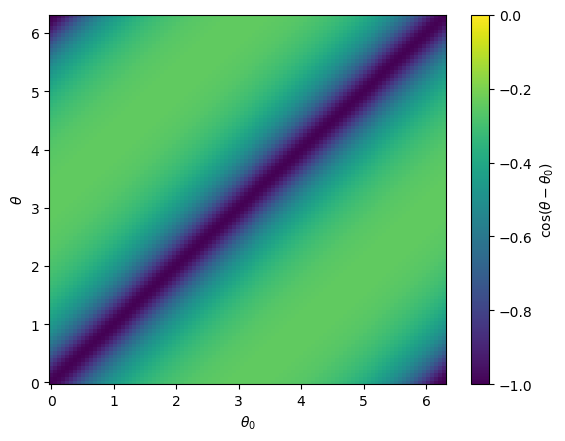

In [5]:
# define symbols for sympy
r, theta, z , r0 , theta0 , z0 = sp.symbols('r, theta, z, r0, theta0, z0', real=True, positive=True)

# deifine the magnitude of the vector
mag = sp.sqrt((r*sp.cos(theta) - r0*sp.cos(theta0))**2 + (r*sp.sin(theta) - r0*sp.sin(theta0))**2 + (z - z0)**2)

# print the mag expression - render latex
display("The magnitude", mag)

# the cosine angle betwen z-axis and the vector
cos_theta = (z - z0)/mag
display("The cosine angle", cos_theta)

# expand the cosine angle
cos_theta = sp.expand(cos_theta)
display("The expanded cosine angle", cos_theta)

# simplify the cosine angle
cos_theta = sp.simplify(cos_theta)
display("The simplified cosine angle", cos_theta)


## Plot this function for different values of theta0 and theta
# use 1 for all other variables
to_plot = cos_theta.subs([(r, 1), (z, 0), (r0, 1), (z0, 0.5)])

# define the range of theta0: 0, 2 pi and theta: 0, 2 pi
theta0_range = np.linspace(0, 2*np.pi, 100)
theta_range = np.linspace(0, 2*np.pi, 100)

# numpy function from sympy
to_plot = sp.lambdify((theta0, theta), to_plot, 'numpy')

# meshgrid
theta0_grid, theta_grid = np.meshgrid(theta0_range, theta_range)

# calculate the values
to_plot_results = to_plot(theta0_grid, theta_grid)

# plot the results
plt.figure()
plt.pcolormesh(theta0_range, theta_range, to_plot_results)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta$')


# limit colorbar from -1 to 1
plt.clim(-1, 0)
cbar = plt.colorbar()
cbar.set_label(r'$\cos(\theta - \theta_0)$')
plt.show()




## Cosine Integration
The integration of the $\cos(n,r-r_0)$ term was tried with sympy but specific assumptions on specific terms were needed and the integration was not successful. The integration can be done numerically using the same Gauss-Legendre quadrature when required. Rather the integration when carried out in Mathematica resulted in a solution. The solution is in terms of incomplete elliptic integrals of the first kind.

The simplified $\cos(n,r-r_0)$ term is given below where $\theta_0$ is the angle of the vector at the observation point and $\theta$ is the angle of the vector at the source point and the integration is required over the angle $\theta$.

$$\frac{z - z_{0}}{\sqrt{r^{2} - 2 r r_{0} \cos{\left(\theta - \theta_{0} \right)} + r_{0}^{2} + z^{2} - 2 z z_{0} + z_{0}^{2}}}$$

The expression can be further simplifield to:

$$ \cos(n,r-r_0)  =  \frac{a}{\sqrt{b - c \cos{\left(\theta - \theta_{0} \right)}}} $$

where $a = z - z_{0}$, $b = r^{2} + z^{2} + z_{0}^{2} - 2 z z_{0} + r_{0}^{2}$ and $c = 2 r r_{0}$.

Now the results of integration, $\int \cos(n,r-r_0) d\theta$ can be expressed in terms of the incomplete elliptic integrals of the first kind. The results from Mathematica are given below:

$$\frac{2 a \left(\; EllipticF\left(\frac{d}{2},\frac{-2c}{b-c}\right) - \; EllipticF\left(\frac{d-2\pi}{2},\frac{-2c}{b-c}\right) \right)}{\sqrt{b-c}}$$

The Green's function also includes the dependence on $\theta$ and $\theta_0$. So the integration of the cosine term should also include the Green's function. So a two dimensional numerical integration is required.

## Numerical Integration of the Rayleigh-Sommerfeld Integral
Two dimensional integration is required. So different integration methods available in scipy can be used. Also, the integrand is a complex function and requires integration of the real and the imaginary parts separately.

Use ``` scipy.integrate.dblquad ```

Note that the function to integrate in dblquad need to be of the form:

``` f(y, x) ```

where $x$ is the variable of integration whose limits are provided first and $y$ is the variable of integration whose limits are provided second.

In [6]:
from scipy import integrate




In [7]:
# define the function to integrate: This would provide the real and imaginary parts as arrays of real and imaginary parts
def ray_sommerfeld(r, theta, params):
    # params = [r0, theta0, z0, k, f,...]
    r0 = params[0]
    theta0 = params[1]
    z0 = params[2]
    k = params[3]

    # make a vector r - r0
    src_v = np.array([r , theta, 0])
    det_v = np.array([r0, theta0, z0])

    # change to cartesian coordinates
    src_v_cart = cylind_to_cart_coords(src_v)
    det_v_cart = cylind_to_cart_coords(det_v)

    # calculate the vector r - r0
    dest_src_v = src_v_cart - det_v_cart

    # calculate the magnitude of the vector
    mag_r = np.linalg.norm(dest_src_v)

    # calculate the cosine angle between the z-axis and the vector
    cos_n_theta = np.abs(dest_src_v[2])/mag_r



    ## Calculate the Initial Electric Field -- make a method for this later on
    ############################################################################################################
    # # use a plane polarized wave as initial wave with gaussian distribution of the amplitude
    # w0 = 500.0e-6
    # E_amp = np.exp(-r**2/w0**2)
    # # The electric field is propagating in the z-direction only - and has accumulated no phase
    # z_travelled = 0.0
    # E_field = E_amp*np.exp(1j*k*z_travelled)
    # Re_Efield = E_field.real
    # Im_Efield = E_field.imag

    E_field = initial_field(r, theta,k)
    Re_Efield = E_field.real
    Im_Efield = E_field.imag
    ############################################################################################################
    


    # ## From Green FUnctions component
    # G_comp = np.exp(1j*k*mag_r)/(mag_r)

    G_comp = np.exp(1j*k*mag_r)/(2*np.pi*mag_r**2.0)


    ## pre factor before integration in Eq:II.52 ( reference from Dr. Miles )
    # pre_factor = -1j*k/(2*np.pi)

    pre_factor = (1.0-1j*k*mag_r)

    ## Area factor: dS = r dr dtheta
    area_factor = r


    # The complete integrand = pre_factor*G_comp*E_field*cos_n_theta

    Integrand_complex = pre_factor*G_comp*E_field*cos_n_theta*area_factor
    # Integrand_complex = area_factor

    # ## Print the integrand and r and mag_r
    # print('The integrand is: {}'.format(Integrand_complex))
    # print('The r is: {}'.format(r))
    # print('The theta is: {}'.format(theta))
    # print('The mag_r is: {}'.format(mag_r))

    ## check the integration
    # Integrand_complex = r + 0j # should give the area of circle

    Re_Integ = Integrand_complex.real
    Im_Integ = Integrand_complex.imag

    return Re_Integ, Im_Integ , cos_n_theta, mag_r, E_field


# define real part integrand
def real_part_integrand(theta,r, params):
    Re_Integ, Im_Integ, = ray_sommerfeld(r, theta, params)[0:2]
    return Re_Integ

# define imaginary part integrand
def imag_part_integrand(theta,r, params):
    Re_Integ, Im_Integ = ray_sommerfeld(r, theta, params)[0:2]
    return Im_Integ

    
# define the initial field
def initial_field(r, theta,k):
    

    # ############################################################################################################
    # # use a plane polarized wave as initial wave with gaussian distribution of the amplitude
    # w0 = 500.0e-6
    # E_amp = np.exp(-r**2/w0**2)
    # # The electric field is propagating in the z-direction only - and has accumulated no phase
    # z_travelled = 0.0
    # E_field = E_amp*np.exp(1j*k*z_travelled)


    # make a point source
    # z is so far: it entails a plane wave
    E_amp = 1.0*np.ones_like(r)
    z_travelled = -1.0
    E_field = E_amp*np.exp(1j*k*z_travelled)/z_travelled
    # Re_Efield = E_field.real
    # Im_Efield = E_field.imag
    ############################################################################################################
    return E_field




Error Re and Im: 5.838307916511169e-07 and 4.969733935014504e-07
Error Re and Im: 1.0914706211324515e-13 and 0
Error Re and Im: 1.0914703231074005e-13 and 0
Error Re and Im: 1.0914698264521136e-13 and 0
Error Re and Im: 1.0914691311670336e-13 and 0
Error Re and Im: 1.09146823725278e-13 and 0
Error Re and Im: 1.0914671447101485e-13 and 0
Error Re and Im: 1.0914658535401139e-13 and 0
Error Re and Im: 1.0914643637438261e-13 and 0
Error Re and Im: 1.0914626753226134e-13 and 0
Error Re and Im: 1.0914607882779804e-13 and 0
Error Re and Im: 1.0914587026116087e-13 and 0
Error Re and Im: 1.091456418325357e-13 and 0
Error Re and Im: 1.0914539354212613e-13 and 0
Error Re and Im: 1.0914512539015341e-13 and 0
Error Re and Im: 1.0914483737685652e-13 and 0
Error Re and Im: 1.0914452950249209e-13 and 0
Error Re and Im: 1.0914420176733459e-13 and 0
Error Re and Im: 1.0914385417167596e-13 and 0
Error Re and Im: 1.0914348671582611e-13 and 0
Error Re and Im: 1.0914309940011237e-13 and 0
Error Re and Im: 1

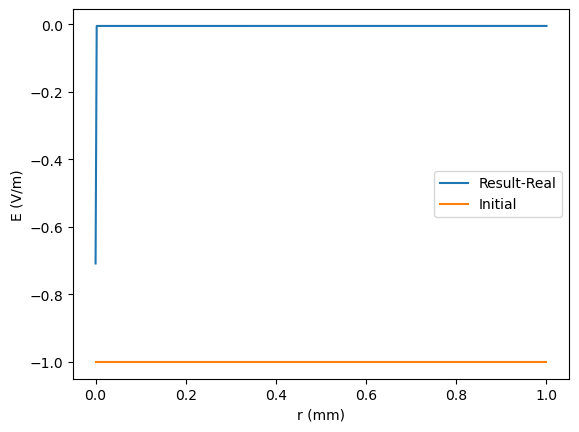

In [8]:
### Integrate
# define the parameters
src_r = np.linspace(1.0e-6, 1.0, 400)*1e-3
src_theta = np.linspace(0, 2*np.pi, 100)
src_z = 0.0

det_r = src_r
det_theta = 0.0
det_z = 10.0e-3

lam = 1064e-9
k = 2*np.pi/lam



## Use integrate.dblquad to integrate the function in two variables
# define the limits of integration
r_min = 1.0e-10
r_max = 1.0e-3
theta_min = 0.0
theta_max = 2*np.pi


# store the electric field in E_result
E_result = np.zeros(len(src_r), dtype=complex)

# loop over the radius and integrate
for i in range(len(det_r)):
    # define the parameters
    params = [det_r[i], det_theta, det_z, k]

    # subdivide the big integration into number of divisions for the theta integration
    theta_divs = 2
    theta_divs_array = np.linspace(theta_min, theta_max, theta_divs)

    # division for the r integration
    r_divs = 2
    r_divs_array = np.linspace(r_min, r_max, r_divs)

    # E_sum = 0 + 0j

    # loop over the divisions
    for j in range(theta_divs-1):
        for k in range(r_divs-1):

            new_theta_min = theta_divs_array[j]
            new_theta_max = theta_divs_array[j+1]

            new_r_min = r_divs_array[k]
            new_r_max = r_divs_array[k+1]

            # # print new_theta_min, new_theta_max, new_r_min, new_r_max
            # print('The new theta min is: {}'.format(new_theta_min))
            # print('The new theta max is: {}'.format(new_theta_max))
            # print('The new r min is: {}'.format(new_r_min))
            # print('The new r max is: {}'.format(new_r_max))


            # integrate over current division
            Re_Integ, err_Re = integrate.dblquad(real_part_integrand, new_r_min, new_r_max, lambda x: theta_divs_array[j], lambda x: theta_divs_array[j+1], args=(params,))
            Im_Integ, err_Im = integrate.dblquad(imag_part_integrand, new_r_min, new_r_max, lambda x: theta_divs_array[j], lambda x: theta_divs_array[j+1], args=(params,))

            # print err_Re, err_Im
            print('Error Re and Im: {} and {}'.format(err_Re, err_Im))


            # Im_Integ = 0.0
            # add the result to the total result
            E_result[i] += Re_Integ + 1j*Im_Integ
            # E_sum = E_result[i]




    # # integrate
    # Re_Integ, err_Re = integrate.dblquad(real_part_integrand, r_min, r_max, lambda x: theta_min, lambda x: theta_max, args=(params,))
    # Im_Integ, err_Im = integrate.dblquad(imag_part_integrand, r_min, r_max, lambda x: theta_min, lambda x: theta_max, args=(params,))

    # # store the result
    # E_result[i] = Re_Integ + 1j*Im_Integ


# plot the initial field and the new field
plt.figure()

# plot E_result^2
# plt.plot(src_r*1e3, np.abs(E_result)**2, label='E_result')

# ini_E = initial_field(src_r, src_theta, k)
# plt.plot(src_r*1e3, np.abs(ini_E)**2, label='initial field')


# # find magnitude of the field
# E_mag = np.abs(E_result)
plt.plot(src_r*1e3, E_result.real, label='Result-Real')
# # plt.plot(src_r*1e3, E_mag, label='Result-mag')
plt.plot(src_r*1e3, initial_field(src_r, src_theta,k).real, label='Initial')

plt.xlabel('r (mm)')
plt.ylabel('E (V/m)')
plt.legend()


# print result real part 
print('The real part of the result is: {}'.format(E_result.real))

C:\Users\pokha_43jqys3\AppData\Local\Temp\ipykernel_44612\3989637813.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  src_v = np.array([r , theta, 0])
C:\Users\pokha_43jqys3\AppData\Local\Temp\ipykernel_44612\2053900175.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[np.cos(theta), -np.sin(theta), 0],
C:\Users\pokha_43jqys3\AppData\Local\Temp\ipykernel_44612\2053900175.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

Text(0.5, 0, 'r (mm)')

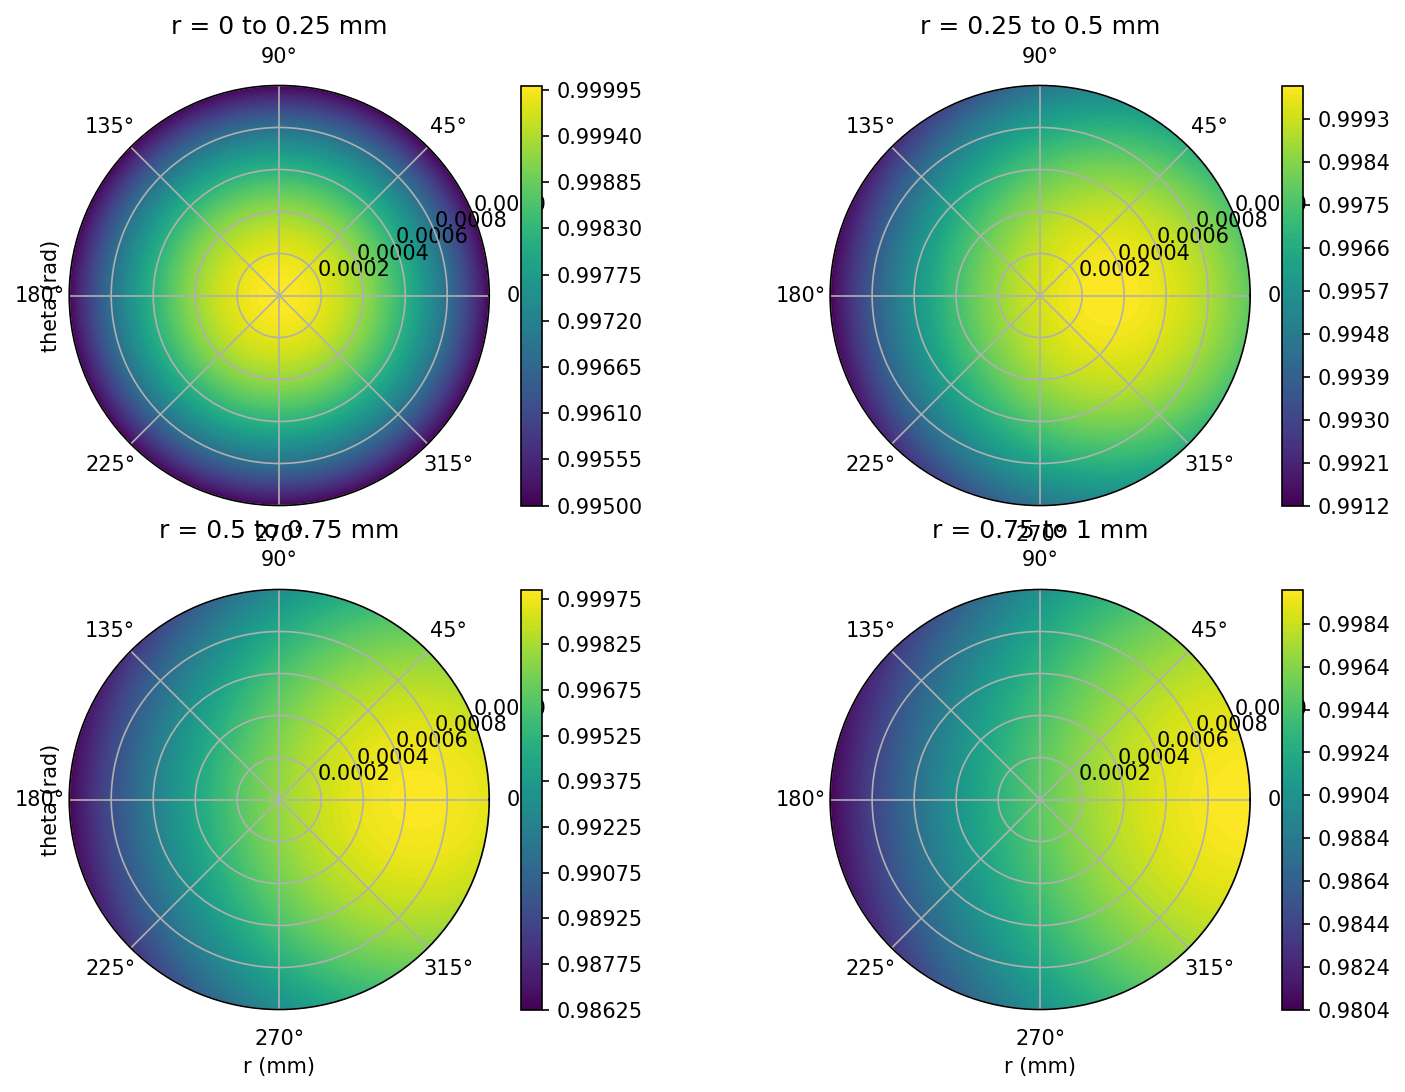

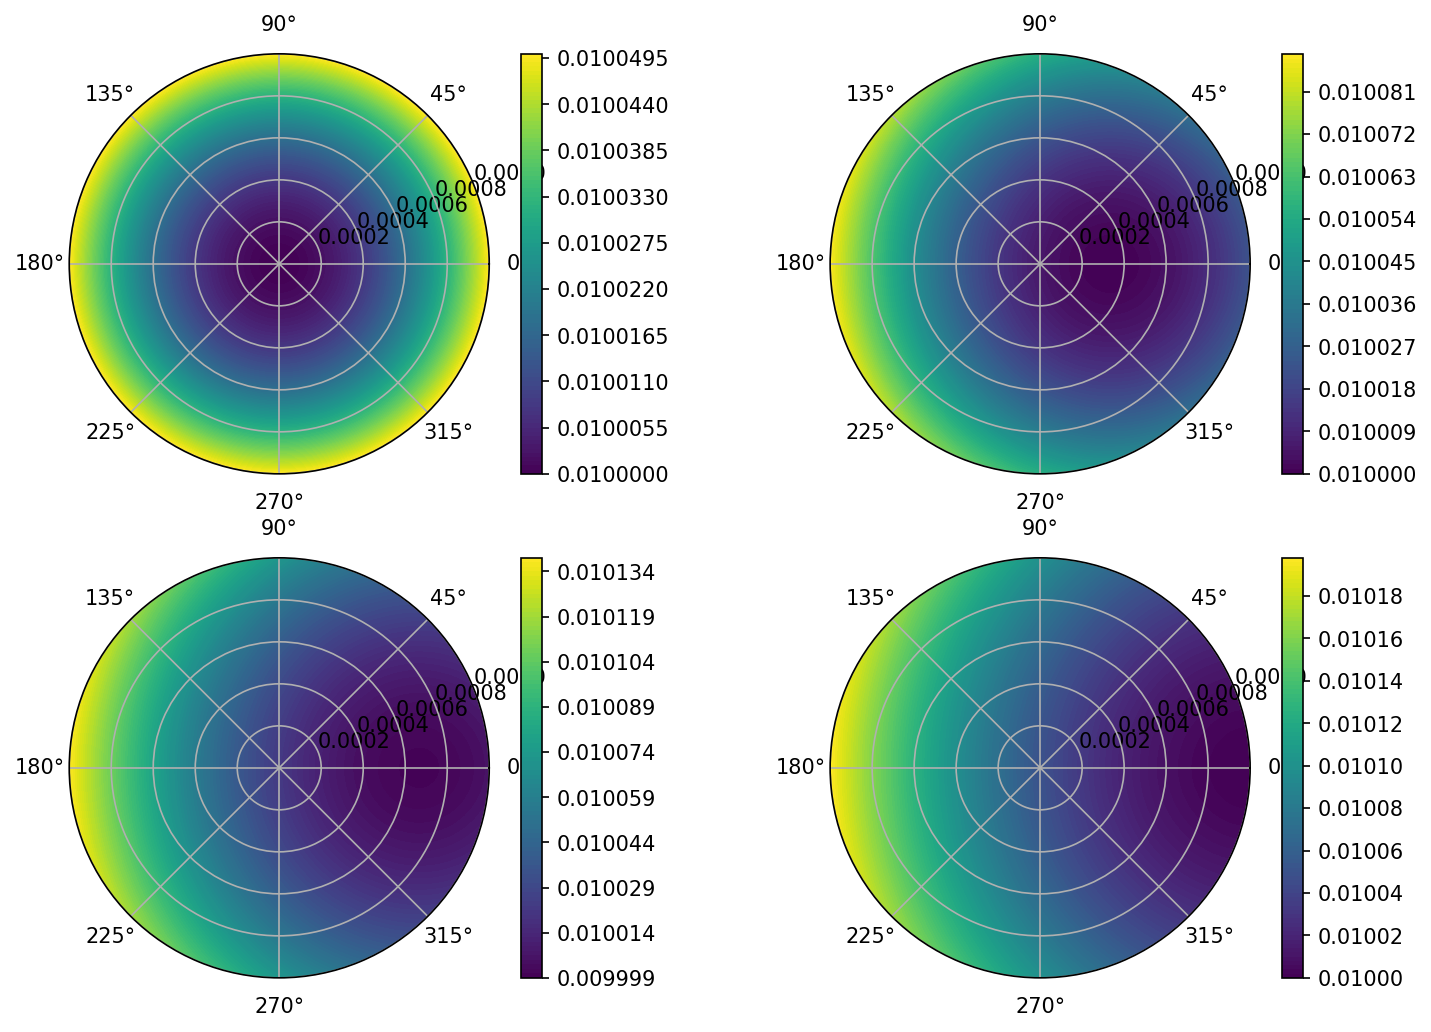

In [9]:
## Make a contour plot of the integrand for different values of r and theta
# define the parameters
params = [det_r[0], det_theta, det_z, k]

# define the limits of integration
r_min = 0
r_max = 1.0e-3

# make 4 divisions of r
r_divs = 4
r_divs_array = np.linspace(r_min, r_max, r_divs)

# make figures with 4 subplots one each for the divisions in r
# these are polar plots
fig, ax = plt.subplots(2,2, subplot_kw=dict(projection='polar'))
# fig, ax = plt.subplots(2,2)

# size of the figure
fig.set_size_inches(12,8)

# dpi of the figure
fig.set_dpi(150)

# another figure for imaginary part
fig2, ax2 = plt.subplots(2,2, subplot_kw=dict(projection='polar'))
# fig2, ax2 = plt.subplots(2,2)

fig2.set_size_inches(12,8)
fig2.set_dpi(150)

# loop over the divisions
for i in range(r_divs):
    
    # meshgrid for the r and theta
    r_mesh, theta_mesh = np.meshgrid(src_r, src_theta)

    params = [r_divs_array[i], det_theta, det_z, k]

    # calculate the integrand
    Re_integrand, Im_integrand , cos, mag, efield = ray_sommerfeld(r_mesh, theta_mesh, params)

#     # plot the integrand 
    sub1 = ax[int(i/2), i%2].contourf( theta_mesh,r_mesh, cos, 100)
    # colorbar
    fig.colorbar(sub1, ax=ax[int(i/2), i%2])
    # imaginary part
    sub2 = ax2[int(i/2), i%2].contourf( theta_mesh,r_mesh, mag, 100)
    # colorbar
    fig2.colorbar(sub2, ax=ax2[int(i/2), i%2])


# details
ax[0,0].set_title('r = 0 to 0.25 mm')
ax[0,1].set_title('r = 0.25 to 0.5 mm')
ax[1,0].set_title('r = 0.5 to 0.75 mm')
ax[1,1].set_title('r = 0.75 to 1 mm')

ax[0,0].set_ylabel('theta (rad)')
ax[1,0].set_ylabel('theta (rad)')
ax[1,0].set_xlabel('r (mm)')
ax[1,1].set_xlabel('r (mm)')

# colorbar
# fig.colorbar(ax[0,0].contourf(r_mesh, theta_mesh, Re_integrand, 100), ax=ax.ravel().tolist())

In [10]:
# import scipy for fft
from scipy.fftpack import fft2,fft,ifft2,ifft
from scipy.fftpack import fftshift, fftfreq, ifftshift

In [11]:
## Use the far field approximation to calculate the field
# Needs the fourier transform of the initial field

c = 299792458.0
eps0 = 8.854187817e-12
ref_n = 1.0

wln = 1064e-9
k = 2*np.pi/wln

divs_xy = 1024
divs_z = 50

## make the initial plane mesh grid in x and y, the wave is travelling in the z direction
# define the limits of the plane
x_min = -8.0e-3
x_max = 8.0e-3
y_min = -8.0e-3
y_max = 8.0e-3

# number of divisions
x_divs = divs_xy
y_divs = divs_xy

# make the divisions
x_divs_array = np.linspace(x_min, x_max, x_divs)
y_divs_array = np.linspace(y_min, y_max, y_divs)

# make the meshgrid
x_mesh, y_mesh = np.meshgrid(x_divs_array, y_divs_array)

# use the same mesh as observation plane
x_mesh_obs, y_mesh_obs = np.meshgrid(x_divs_array, y_divs_array)

# define the parameters
z0_min = 0.5e-2
z0_max = 1.0e-2
z0_divs = divs_z
z0_divs_array = np.linspace(z0_min, z0_max, z0_divs)

dx = x_divs_array[1] - x_divs_array[0]
dy = y_divs_array[1] - y_divs_array[0]


# sampaling frequency
fsx = 1/dx
fsy = 1/dy

fx = fsx/(x_divs)*np.arange(0,x_divs,step=1)
fy = fsy/(y_divs)*np.arange(0,y_divs,step=1)



# meshgrid with x and z0
x_mesh_zx, z0_mesh_zx = np.meshgrid(x_divs_array, z0_divs_array)

# result of the field in the observation plane like x_mesh_zx
E_result_zx = np.zeros_like(x_mesh_zx, dtype=complex)

# hold mesh and result in where the values would be appended in the loop

mesh_zx_x = []
mesh_zx_z0 = []
result_zx = []


# define initial electric field at the initial plane as some sort of gaussian
p = 1
w0 = 100.0e-6
# E_amp = np.exp(-((x_mesh**2 + y_mesh**2)/w0**2)**p)


# make an Airy disk profile using the sinc function
# E_amp = np.sinc((x_mesh**2 + y_mesh**2)/w0**2)
# E_amp 

# make a circular aperture with radius w0
E_amp = np.zeros_like(x_mesh)
E_amp[(x_mesh**2 + y_mesh**2) < w0**2] = 1.0



E0 = np.ones(x_mesh.shape, dtype=complex)*E_amp

# transformation from the lens
fl = 300.0e-3
T_lens = np.exp(-1j*k/(2*fl)*(x_mesh**2 + y_mesh**2))

# operate the transformation on the initial field
E1 = E0

# loop over z0 and calculate the field in xy plane
for i in range(z0_divs):

    # select i for the z0
    # i = int(z0_divs/5)

    z0 = z0_divs_array[i]


    # z0 = 10.0e-3


    # observation plane

    xPrime   = np.hstack((fx[-int(fx.size/2):] - fsx, fx[0:int(fx.size/2)])) * wln * z0
    yPrime   = np.hstack((fy[-int(fy.size/2):] - fsy, fy[0:int(fy.size/2)])) * wln * z0

    xPrime_mesh, yPrime_mesh = np.meshgrid(xPrime, yPrime)

    # save field observation plane and the z0 by appending
    mesh_zx_x.append(xPrime)
    # append same z0 for all xPrime
    mesh_zx_z0.append(np.ones_like(xPrime)*z0)
    




    # Field to FFT
    to_fft = E1*np.exp(1j*k/(2.0*z0)*(x_mesh**2 + y_mesh**2))
    # to_fft = np.exp(1j*k/(2.0*z0)*(x_mesh**2 + y_mesh**2))

    # pre_factor after the FFT
    pre_factor = np.exp(1j*k*z0)/(1j*wln*z0)*np.exp(1j*k/(2.0*z0)*(xPrime_mesh**2 + yPrime_mesh**2))

    # perform fft only
    E_fft = np.fft.fft2(fftshift(to_fft))
    # shift the fft
    E_fft_shift = fftshift(E_fft)


    # calculate the field in the observation plane
    E_result = pre_factor*E_fft_shift

    # store the result for xz plane, here y = 0 and is at the center of the observation plane
    result_zx_toappend = E_result[int(E_result.shape[0]/2),:]
    result_zx.append(result_zx_toappend)


# convert the list to array
mesh_zx_x = np.array(mesh_zx_x)
mesh_zx_z0 = np.array(mesh_zx_z0)
result_zx = np.array(result_zx)



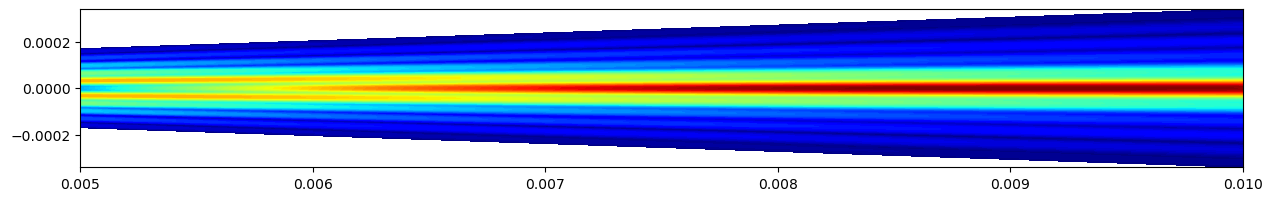

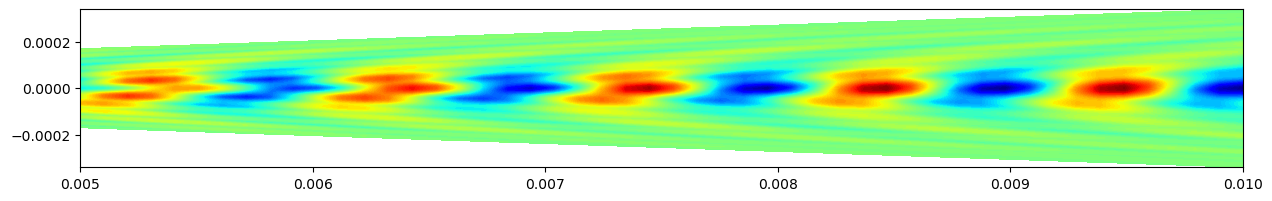

In [12]:
# make tricontour plots from the mesh and result
fig, ax = plt.subplots(1,1, figsize=(15,10))
# make the contour plot
contour = ax.tricontourf(mesh_zx_z0.flatten(), mesh_zx_x.flatten(), np.abs(result_zx.flatten()), 100, cmap='jet')
# same aspect ratio for the plot in x and y
ax.set_aspect('equal')
# limit y with the limits of the real mesh
# ax.set_ylim(x_min, x_max)


# Make another plot for the real part of the field
fig, ax = plt.subplots(1,1, figsize=(15,10))
# make the contour plot
contour = ax.tricontourf(mesh_zx_z0.flatten(), mesh_zx_x.flatten(), np.real(result_zx.flatten()), 100, cmap='jet')
ax.set_aspect('equal')
# ax.set_ylim(x_min, x_max)

# # Make another plot for the imaginary part of the field
# fig, ax = plt.subplots(1,1, figsize=(15,10))
# # make the contour plot
# contour = ax.tricontourf(mesh_zx_z0.flatten(), mesh_zx_x.flatten(), np.imag(result_zx.flatten()), 100, cmap='jet')
# ax.set_aspect('equal')



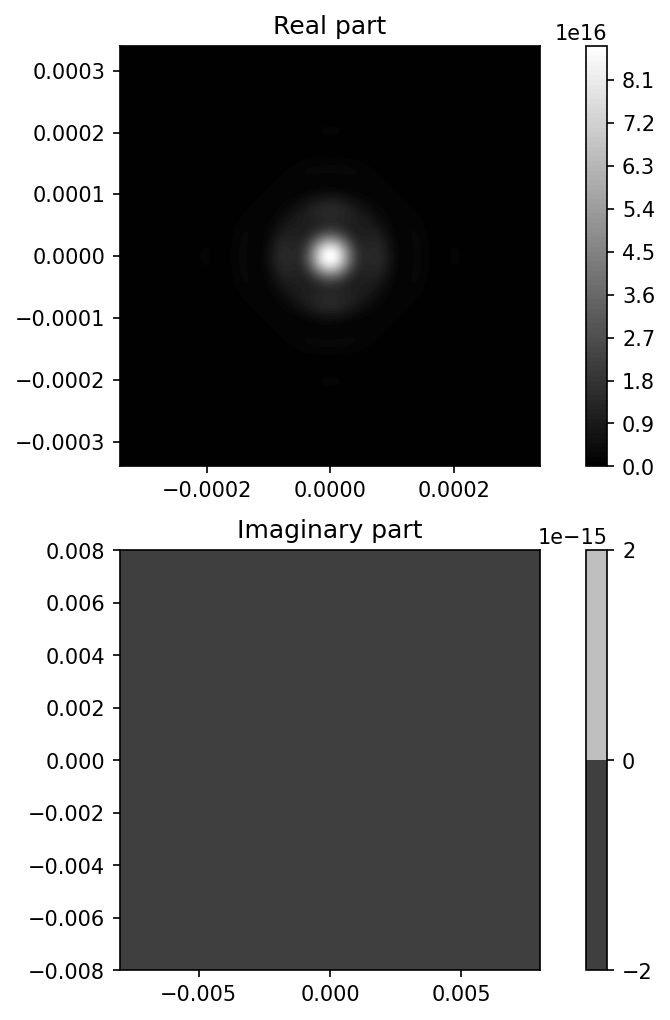

In [13]:
# plot E2 real and imaginary part
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,8)
fig.set_dpi(150)


mag_sq = np.abs(E_result)**2
int_result = ref_n*eps0*c*mag_sq/2.0

# normalize the intensity
int_result_norm = int_result/np.max(int_result)

# real part
sub1 = ax[0].contourf(xPrime_mesh, yPrime_mesh, np.real(int_result), 100, cmap='gray')
fig.colorbar(sub1, ax=ax[0])

# imaginary part
sub2 = ax[1].contourf(x_mesh_obs, y_mesh_obs, np.imag(int_result), 100, cmap='gray')
fig.colorbar(sub2, ax=ax[1])



obs_xmin = -1.0e-3
obs_xmax = 1.0e-3
#limit x and y
# ax[0].set_xlim([obs_xmin, obs_xmax])
# ax[0].set_ylim([obs_xmin, obs_xmax])
# details
ax[0].set_title('Real part')
ax[1].set_title('Imaginary part')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')



(-0.008, 0.008)

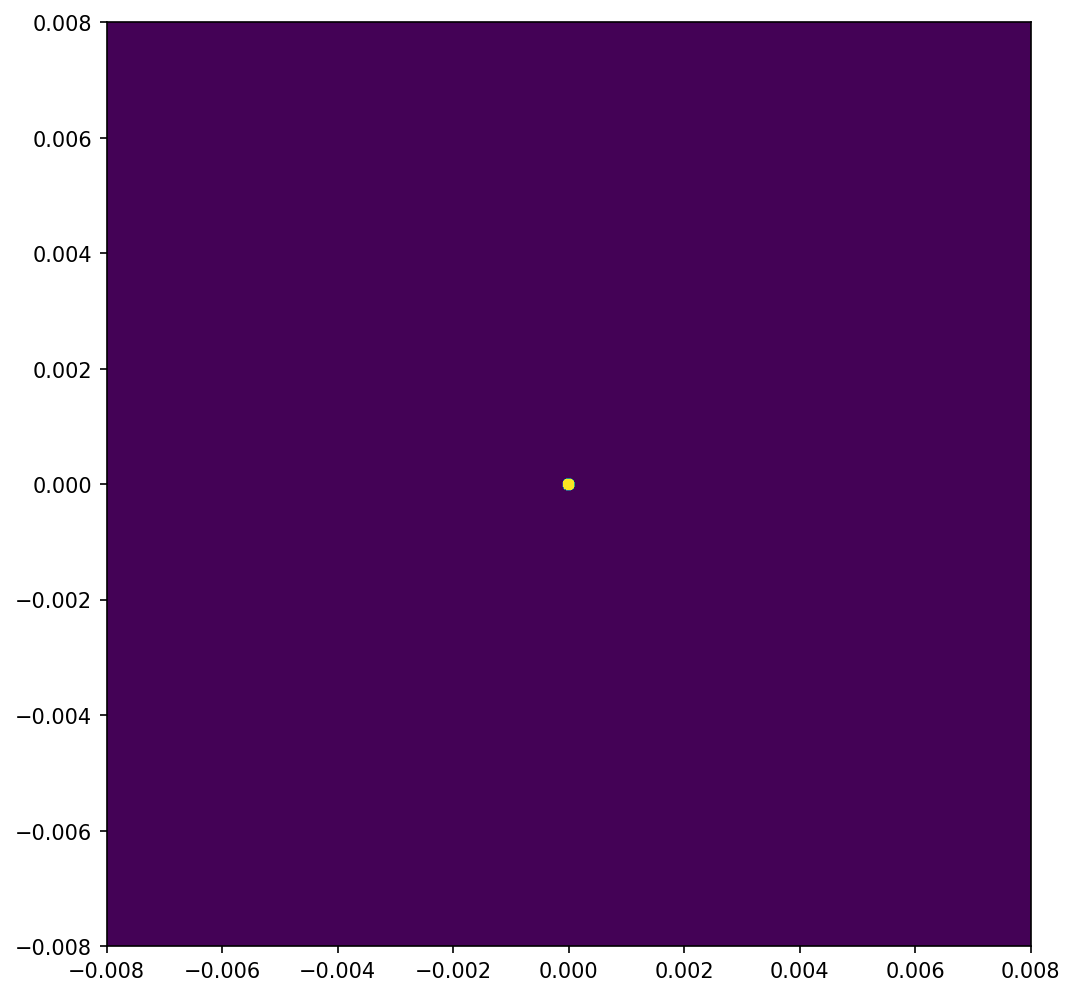

In [14]:
# plot E0
fig, ax = plt.subplots(1,1)
# pixel density and size    
fig.set_size_inches(8,8)
fig.set_dpi(150)
ax.contourf(x_mesh, y_mesh, E1.real, 100)
ax.set_aspect('equal')
# limit
ax.set_xlim([x_min, x_max])

z0:  0.005
z0:  0.01


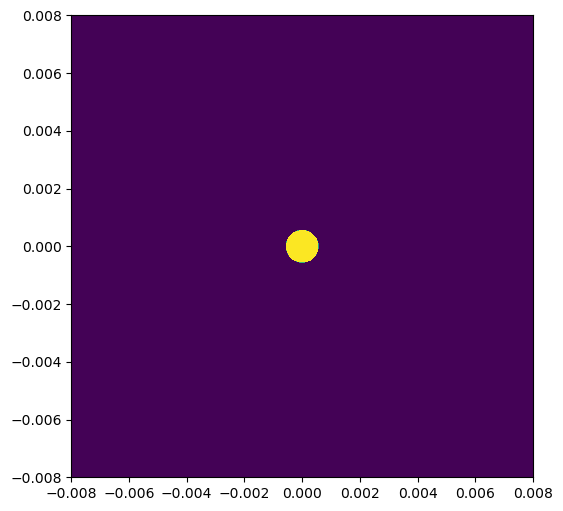

In [15]:
## Use the far field approximation to calculate the field
# Needs the fourier transform of the initial field

c = 299792458.0
eps0 = 8.854187817e-12
ref_n = 1.0

wln = 0.6e-6
k = 2*np.pi/wln

divs_xy = 1024
divs_z = 2

## make the initial plane mesh grid in x and y, the wave is travelling in the z direction
# define the limits of the plane
x_min = -8.0e-3
x_max = 8.0e-3
y_min = -8.0e-3
y_max = 8.0e-3

# number of divisions
x_divs = divs_xy
y_divs = divs_xy

# make the divisions
x_divs_array = np.linspace(x_min, x_max, x_divs)
y_divs_array = np.linspace(y_min, y_max, y_divs)

dx = x_divs_array[1] - x_divs_array[0]
dy = y_divs_array[1] - y_divs_array[0]


# sampaling frequency
fsx = 1/dx
fsy = 1/dy

fx = fsx/(x_divs)*np.arange(0,x_divs,step=1)
fy = fsy/(y_divs)*np.arange(0,y_divs,step=1)

# from fftfreq
fx_fft = np.fft.fftfreq(x_divs, d=dx)
fy_fft = np.fft.fftfreq(y_divs, d=dy)

# shift the fftfrequency
fx_fft = np.fft.fftshift(fx_fft)
fy_fft = np.fft.fftshift(fy_fft)

# # print fx and fy and compare with fx_fft and fy_fft
# print ('fx: ', fx)
# print ('fy: ', fy)
# print ('fx_fft: ', fx_fft)
# print ('fy_fft: ', fy_fft)





# make the meshgrid
x_mesh, y_mesh = np.meshgrid(x_divs_array, y_divs_array)

# use the same mesh as observation plane
x_mesh_obs, y_mesh_obs = np.meshgrid(x_divs_array, y_divs_array)

# define the parameters
z0_min = 0.5e-2
z0_max = 1.0e-2
z0_divs = divs_z
z0_divs_array = np.linspace(z0_min, z0_max, z0_divs)



# hold mesh and result in where the values would be appended in the loop
mesh_zx_x = []
mesh_zx_z0 = []
result_zx = []


# define initial electric field at the initial plane as some sort of gaussian
p = 1
w0 = 5.5e-4
# E_amp = np.exp(-((x_mesh**2 + y_mesh**2)/w0**2)**p)


# make an Airy disk profile using the sinc function
# E_amp = np.sinc((x_mesh**2 + y_mesh**2)/w0**2)
# E_amp 

# make a circular aperture with radius w0
E_amp = np.zeros_like(x_mesh)
E_amp[(x_mesh**2 + y_mesh**2) < w0**2] = 1.0



E0 = np.ones(x_mesh.shape, dtype=complex)*E_amp


# plot the aperture
###
# plot E0
fig, ax = plt.subplots(1,1)
# pixel density and size    
fig.set_size_inches(6,6)
fig.set_dpi(100)
ax.contourf(x_mesh, y_mesh, E0.real, 100)
ax.set_aspect('equal')
# limit
ax.set_xlim([x_min, x_max])
####

# transformation from the lens
fl = 300.0e-3
T_lens = np.exp(-1j*k/(2*fl)*(x_mesh**2 + y_mesh**2))

# operate the transformation on the initial field
E1 = E0

# loop over z0 and calculate the field in xy plane
for i in range(z0_divs):

    # select i for the z0
    # i = int(z0_divs/5)

    z0 = z0_divs_array[i]

    # print z0
    print('z0: ', z0)


    # z0 = 10.0e-3


    # observation plane
    xPrime = fx_fft * wln * z0
    yPrime = fy_fft * wln * z0


    xPrime_mesh, yPrime_mesh = np.meshgrid(xPrime, yPrime)

    # save field observation plane and the z0 by appending
    mesh_zx_x.append(xPrime)
    # append same z0 for all xPrime
    mesh_zx_z0.append(np.ones_like(xPrime)*z0)
    




    # Field to FFT
    # to_fft = E1*np.exp(1j*k/(2.0*z0)*(x_mesh**2 + y_mesh**2))

    to_fft = E1
    to_fft_rem = np.exp(1j*k/(2.0*z0)*(x_mesh**2 + y_mesh**2))

    to_fft = to_fft*to_fft_rem

    # pre_factor after the FFT
    pre_factor = np.exp(1j*k*z0)/(1j*wln*z0)*np.exp(1j*k/(2.0*z0)*(xPrime_mesh**2 + yPrime_mesh**2))

    # perform fft only
    E_fft = np.fft.fft2(fftshift(to_fft))
    # shift the fft
    E_fft_shift = fftshift(E_fft)


    # calculate the field in the observation plane
    E_result = E_fft_shift

    # store the result for xz plane, here y = 0 and is at the center of the observation plane
    result_zx_toappend = E_result[int(E_result.shape[0]/2),:]
    result_zx.append(result_zx_toappend)


# convert the list to array
mesh_zx_x = np.array(mesh_zx_x)
mesh_zx_z0 = np.array(mesh_zx_z0)
result_zx = np.array(result_zx)



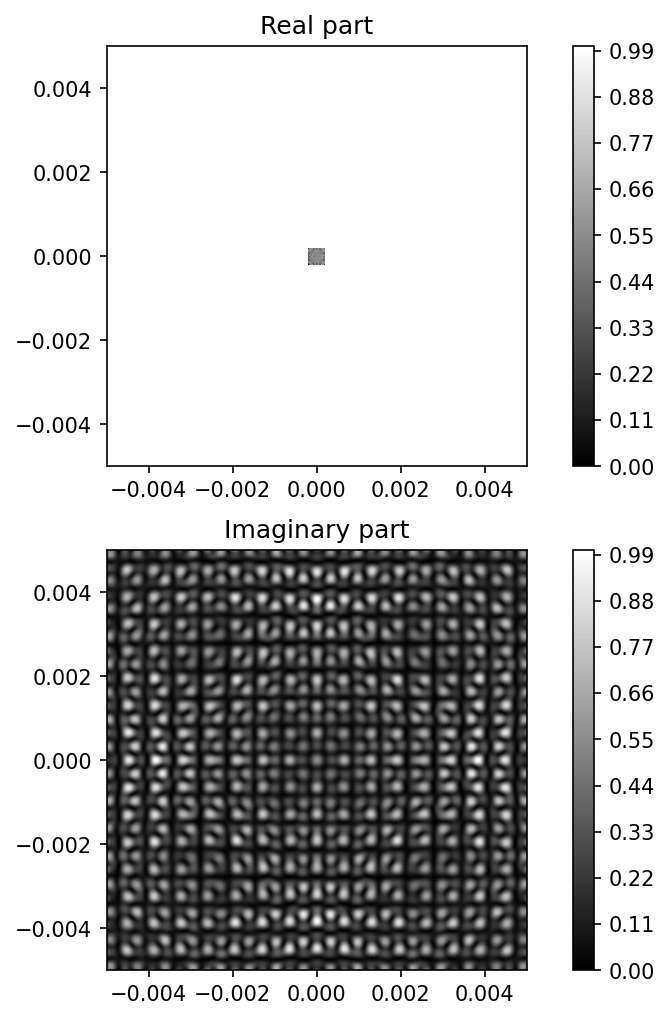

In [16]:

# plot E2 real and imaginary part
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,8)
fig.set_dpi(150)

mag_ = np.abs(E_result)
mag_sq = np.abs(E_result)**2
int_result = ref_n*eps0*c*mag_sq/2.0

# normalize the intensity
int_result_norm = int_result/np.max(int_result)
mag_ = mag_/np.max(mag_)

# real part
sub1 = ax[0].contourf(xPrime_mesh, yPrime_mesh, np.real(mag_), 100, cmap='gray')
fig.colorbar(sub1, ax=ax[0])

# imaginary part
sub2 = ax[1].contourf(x_mesh, y_mesh, np.real(int_result_norm), 100, cmap='gray')
fig.colorbar(sub2, ax=ax[1])



obs_xmin = -5.0e-3
obs_xmax = 5.0e-3
#limit x and y
ax[0].set_xlim([obs_xmin, obs_xmax])
ax[0].set_ylim([obs_xmin, obs_xmax])
ax[1].set_xlim([obs_xmin, obs_xmax])
ax[1].set_ylim([obs_xmin, obs_xmax])
# details
ax[0].set_title('Real part')
ax[1].set_title('Imaginary part')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')



In [17]:
E_amp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\pokha_43jqys3\AppData\Local\Temp\ipykernel_16164\1658302451.py:112: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


max of the absolute value of the fft =  0.023100000000000002


Text(0.5, 0, 'fy [1/m]')

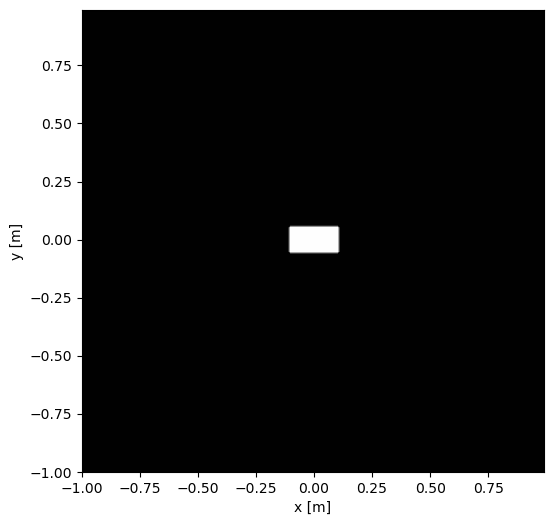

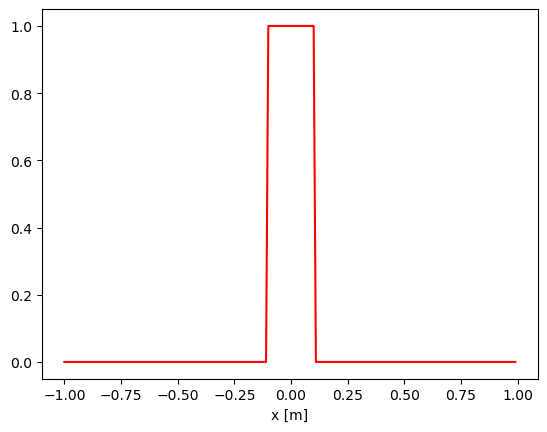

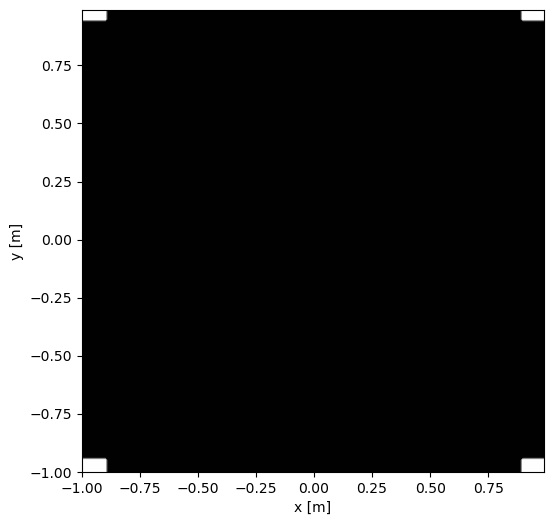

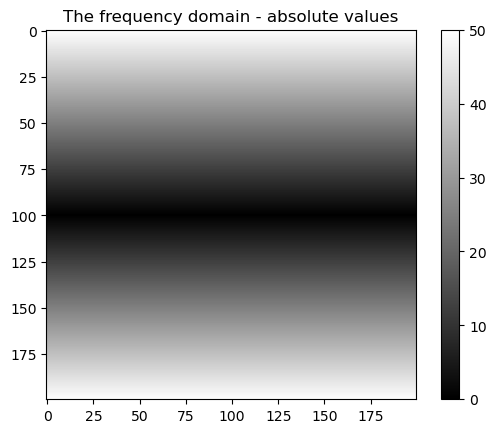

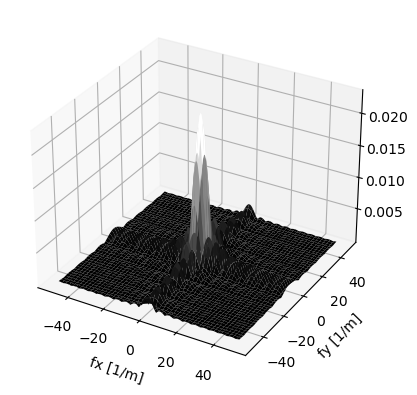

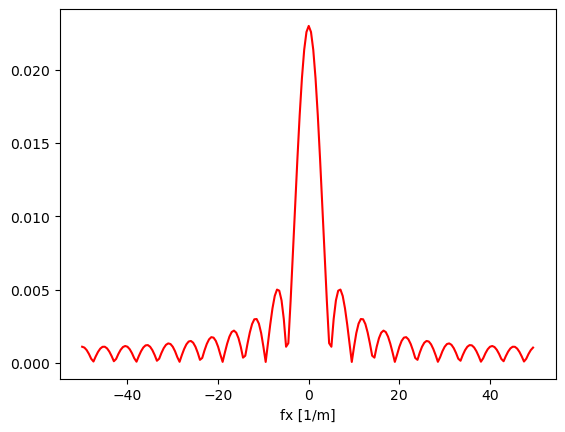

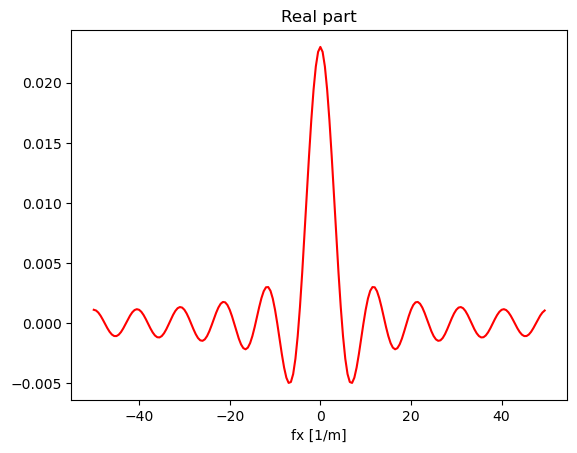

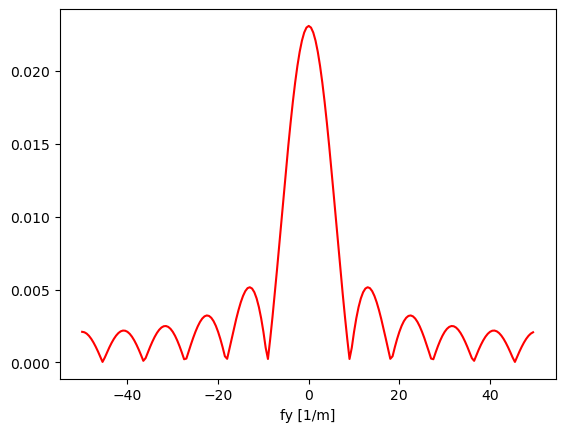

In [3]:
## Two dimensional fft check for normalization and proper scaling

# define a rect function
def rect(x):
    return (np.abs(x) < (1.0/2.0))






# make 2D rectangle function
wx = 0.1        # half width , x [m]
wy = 0.05       # half width , y [m]
L = 2.0         # length [m]
M = 200        # samples per L
dx = L/M        # sample spacing [m]

# make the x and y mesh
x = np.linspace(-L/2.0, L/2.0-dx, M)
y = np.linspace(-L/2.0, L/2.0-dx, M)

x_mesh, y_mesh = np.meshgrid(x, y)

# # make the rectangle function with 1 inside and 0 outside the rectangle
g = np.zeros_like(x_mesh)
g[(np.abs(x_mesh) < wx ) & (np.abs(y_mesh) < wy )] = 1.0
# for isclose values
g[np.isclose(np.abs(x_mesh), wx) & (np.abs(y_mesh) < wy )] = 1.0
g[(np.abs(x_mesh) < wx ) & np.isclose(np.abs(y_mesh), wy)] = 1.0
g[np.isclose(np.abs(x_mesh), wx) & np.isclose(np.abs(y_mesh), wy)] = 1.0

# using rect function
# g[rect(x_mesh/(2.0*wx))*rect(y_mesh/(2.0*wy))] = 1.0



print(g)
# # image display
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
fig.set_dpi(100)

# label x and y
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

# equal aspect ratio
ax.set_aspect('equal')
# plot the rectangle
ax.contourf(x_mesh, y_mesh, g, 100, cmap='gray')


# make a slice of the rectangle and plot a line
# another plot
fig, ax = plt.subplots(1,1)
# label x and y
ax.set_xlabel('x [m]')
g_slice = g[int(g.shape[0]/2+1),:]
ax.plot(x_mesh[int(g.shape[0]/2+1),:], g_slice, 'r-')


# do a fft shift
g0 = fftshift(g)

# plot g0
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
fig.set_dpi(100)

# label x and y
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
# equal aspect ratio
ax.set_aspect('equal')
# plot the rectangle
ax.contourf(x_mesh, y_mesh, g0, 100, cmap='gray')


# do a fft
g_fft0 = fft2(g0)*dx**2       # multiply by dx**2 to scale the fft for 2D

g_fft = fftshift(g_fft0)

# get the frequency array
freq = fftfreq(M, d=dx)
# shift the frequency array
freq = fftshift(freq)

# create the frequency mesh yourself
fx = np.linspace(-1.0/(2.0*dx), 1.0/(2.0*dx), M)
fy = np.linspace(-1.0/(2.0*dx), 1.0/(2.0*dx), M)

## Note: slight difference between the frequency mesh created by fftfreq and linspace so used fftfreq for mesh
# this might be because of even and odd. Turns out the linspace doesnt have exat zero frequency.

fx_mesh, fy_mesh = np.meshgrid(freq, freq)

# plot freq 
# plot
fig, ax = plt.subplots(1,1)
# plot title
ax.set_title('The frequency domain - absolute values')
# plot fx_mesh with imshow
sub1 = ax.imshow(np.abs(fy_mesh), cmap='gray')
# show colorbar
fig.colorbar(sub1, ax=ax)


# plot g_fft in a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(fx_mesh, fy_mesh, np.abs(g_fft), cmap='gray')
ax.set_xlabel('fx [1/m]')
ax.set_ylabel('fy [1/m]')

# print max of the absolute value of the fft
print('max of the absolute value of the fft = ', np.max(np.abs(g_fft)))

# make another plot for slice
fig, ax = plt.subplots(1,1)
ax.plot(fx_mesh[int(g.shape[0]/2+1),:], np.abs(g_fft[int(g.shape[0]/2+1),:]), 'r-')
ax.set_xlabel('fx [1/m]')

# make a plot for the real part only
fig, ax = plt.subplots(1,1)
ax.plot(fx_mesh[int(g.shape[0]/2+1),:], np.real(g_fft[int(g.shape[0]/2+1),:]), 'r-')
ax.set_xlabel('fx [1/m]')
ax.set_title('Real part')


# make slice in another direction
fig, ax = plt.subplots(1,1)
ax.plot(fy_mesh[:,int(g.shape[0]/2)], np.abs(g_fft[:,int(g.shape[0]/2)]), 'r-')
ax.set_xlabel('fy [1/m]')

In [4]:
# [(np.abs(x_mesh) <= wx) & (np.abs(y_mesh) <= wy)]
np.abs(x) <= wx
print(x)
print(wx)
print(np.abs(x))
print(np.abs(x) <= wx)
## approximate comparison for floating point numbers
np.isclose(np.abs(x), wx)


[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91 -0.9  -0.89
 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79 -0.78 -0.77
 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.53
 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07
  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

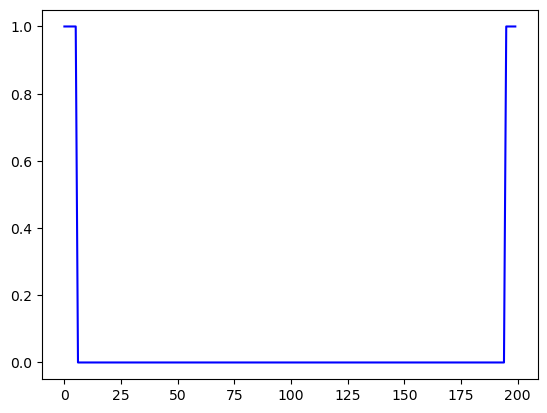

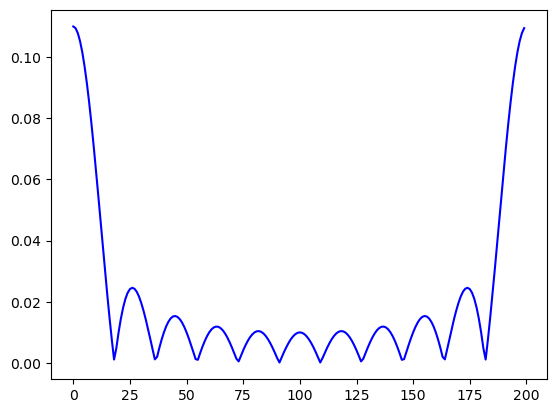

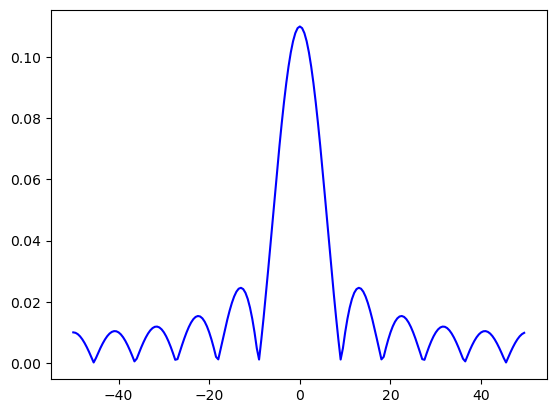

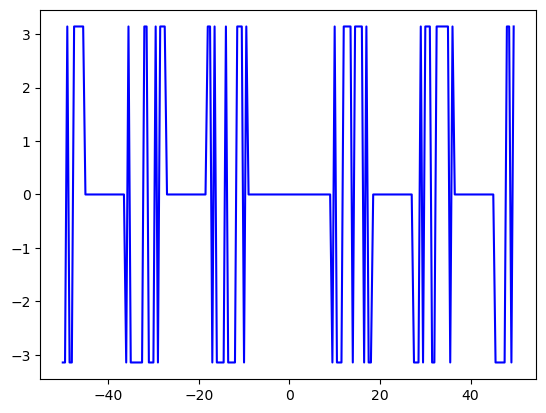

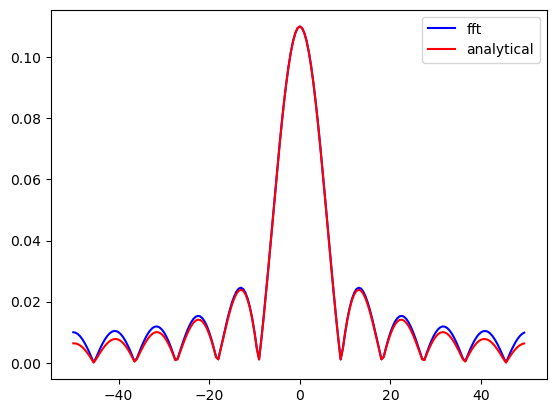

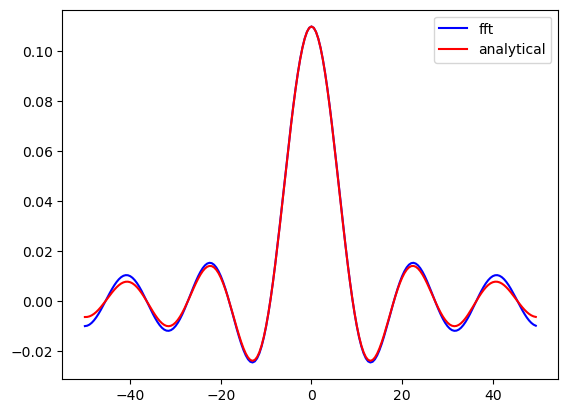

In [5]:
#check 1Dfft and compare to analytical results

w = 0.055
L = 2
M = 200
dx = L/M

x = np.linspace(-L/2, L/2-dx, M)
f = np.zeros_like(x)
f[(np.abs(x) <= w)] = 1.0

# plot f
fig, ax = plt.subplots(1,1)
# ax.plot(x, f, 'r-')


f0 = fftshift(f)
ax.plot( f0, 'b-')


f_fft0 = fft(f0)*dx

# plot f_fft0
fig, ax = plt.subplots(1,1)
ax.plot( np.abs(f_fft0), 'b-')


f_fft = fftshift(f_fft0)
freqs = fftfreq(M, d=dx)
freqs = fftshift(freqs)

# plot f_fft
fig, ax = plt.subplots(1,1)
ax.plot( freqs, np.abs(f_fft), 'b-')

# plot the phase in a new plot
fig, ax = plt.subplots(1,1)
ax.plot( freqs, np.angle(f_fft), 'b-')

# compare with analytical results
f_an = 2*w*np.sinc(2*w*freqs)

# comparison plot
fig, ax = plt.subplots(1,1)
ax.plot( freqs, np.abs(f_fft), 'b-', label='fft')
ax.plot( freqs, np.abs(f_an), 'r-', label='analytical')
ax.legend()

# plot real parts only
fig, ax = plt.subplots(1,1)
ax.plot( freqs, np.real(f_fft), 'b-', label='fft')
ax.plot( freqs, np.real(f_an), 'r-', label='analytical')
ax.legend()


In [6]:
x

array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
       -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
       -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
       -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
       -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,
        0.26,  0.27,

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


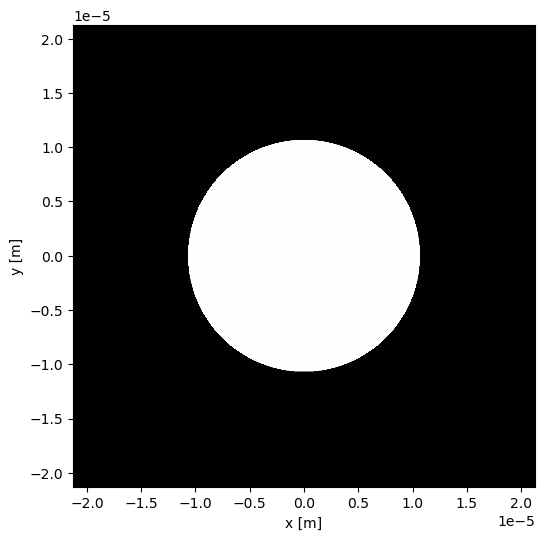

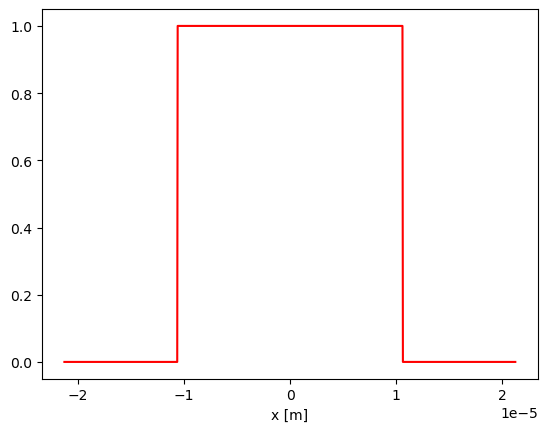

In [7]:
## 2D circular aperture comparison with analytical results
c = 299792458.0
eps0 = 8.854187817e-12
ref_n = 1.0

wln = 1064e-9
k = 2*np.pi/wln

divs_xy = 1024
divs_z = 100

aper = 10*wln

x_min = -2*aper
x_max = 2*aper
y_min = -2*aper
y_max = 2*aper

zmin = 40*wln
zmax = 1.0e4*wln

# make logspace for z
# z = np.logspace(np.log10(zmin), np.log10(zmax), divs_z)
z = 10.0**np.linspace(np.log10(zmin), np.log10(zmax), divs_z)
# z = np.linspace(zmin, zmax, divs_z)

dx = (x_max - x_min)/divs_xy
dy = (y_max - y_min)/divs_xy

# so that zero is always accounted for
x = np.linspace(x_min, x_max-dx, divs_xy)
y = np.linspace(y_min, y_max-dy, divs_xy)

x_mesh, y_mesh = np.meshgrid(x, y)


# hold mesh and result in where the values would be appended in the loop

mesh_zx_x = []
mesh_zx_z = []
result_zx = []
result_z = [] # store result for r = 0 , z = z


# define the initial aperture/field
g = np.zeros_like(x_mesh)
g[(x_mesh**2 + y_mesh**2) <= (aper)**2] = 1.0

# plot the initial aperture
print(g)
# # image display
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
fig.set_dpi(100)

# label x and y
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
# limit x and y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# equal aspect ratio
ax.set_aspect('equal')
# plot the rectangle
ax.contourf(x_mesh, y_mesh, g, 100, cmap='gray')


# make a slice of the rectangle and plot a line
# another plot
fig, ax = plt.subplots(1,1)
# label x and y
ax.set_xlabel('x [m]')
g_slice = g[int(g.shape[0]/2+1),:]
ax.plot(x_mesh[int(g.shape[0]/2+1),:], g_slice, 'r-')

# from fftfreq
fx_fft = np.fft.fftfreq(divs_xy, d=dx)
fy_fft = np.fft.fftfreq(divs_xy, d=dy)

# shift the fftfrequency
fx_fft = np.fft.fftshift(fx_fft)
fy_fft = np.fft.fftshift(fy_fft)

E_result = np.zeros_like(x_mesh, dtype=np.complex128)

# loop over z
for i in range(divs_z):

    z0 = z[i]

    # observation plane
    xPrime = fx_fft * wln * z0
    yPrime = fy_fft * wln * z0

    # make a meshgrid
    xPrime_mesh, yPrime_mesh = np.meshgrid(xPrime, yPrime)

    # save the mesh for plotting : vector flattened
    mesh_zx_x.append(xPrime)
    mesh_zx_z.append(np.ones_like(xPrime)*z0)

    to_fft_rem = np.exp(1j*k/(2.0*z0)*(x_mesh**2 + y_mesh**2))
    to_fft = g*to_fft_rem

    # do a fft shift
    g0 = fftshift(to_fft)

    # do a fft
    g_fft0 = fft2(g0)*dx*dy      # multiply by dx**2 to scale the fft for 2D

    g_fft = fftshift(g_fft0)

    # pre_factor after the FFT
    pre_factor = np.exp(1j*k*z0)/(1j*wln*z0)*np.exp(1j*k/(2.0*z0)*(xPrime_mesh**2 + yPrime_mesh**2))

    E_result = g_fft*pre_factor

    # save the result for plotting
    result_zx_toappend = E_result[int(E_result.shape[0]/2),:]
    result_zx.append(result_zx_toappend)

    # save the result for r = 0
    result_z.append(E_result[int(E_result.shape[0]/2), int(E_result.shape[1]/2)])

# convert to numpy array
mesh_zx_x = np.array(mesh_zx_x)
mesh_zx_z = np.array(mesh_zx_z)
result_zx = np.array(result_zx)
result_z = np.array(result_z)




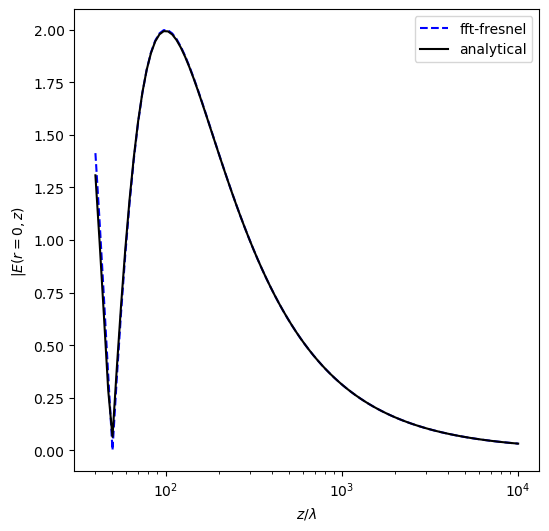

In [8]:
# plot the result: compare with analytical result

# get the analytical result
E_an = np.exp(1j*k*z) - z/(np.sqrt(z**2 + aper**2))*np.exp(1j*k*np.sqrt(z**2 + aper**2))



fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=100)

px = z/wln
ax.plot(px, np.abs(result_z), 'b--', label='fft-fresnel')
ax.plot(px, np.abs(E_an), 'k-', label='analytical')

# log x axis
ax.set_xscale('log')
# label
ax.set_xlabel('$z/\lambda$')
ax.set_ylabel('$|E(r=0,z)$')
# legend
ax.legend()





Text(0, 0.5, '$r$ [m]')

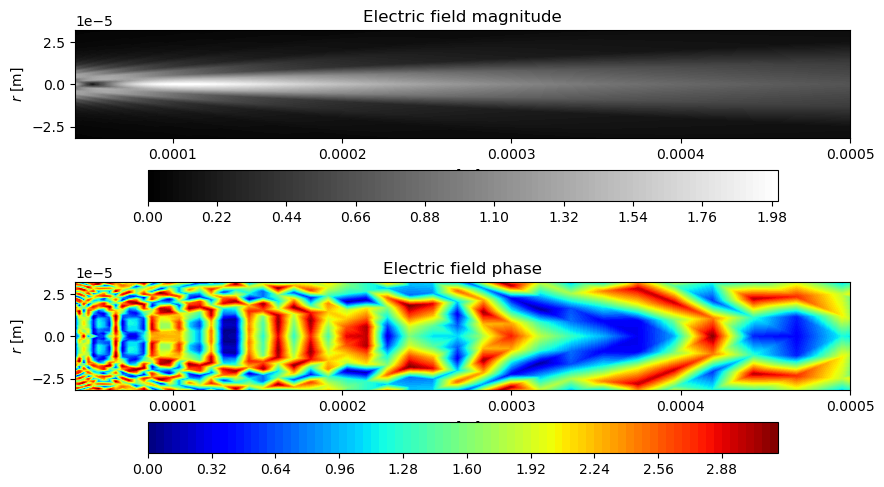

In [9]:
# contour plot
# make tricontour plots from the mesh and result
fig, ax = plt.subplots(2,1, figsize=(10,6))
contour = ax[0].tricontourf(mesh_zx_z.flatten(), mesh_zx_x.flatten(), np.abs(result_zx.flatten()), 100, cmap='gray')
ax[0].set_aspect('equal')

# title
ax[0].set_title('Electric field magnitude')
# limit x
ax[0].set_xlim(zmin, 0.5e-3)
ax[0].set_ylim(-3*aper, 3*aper)
# colorbar - horizontal
fig.colorbar(contour, ax=ax[0], orientation='horizontal')

# label 
ax[0].set_xlabel('$z$ [m]')
ax[0].set_ylabel('$r$ [m]')

# plot the imaginary part
contour = ax[1].tricontourf(mesh_zx_z.flatten(), mesh_zx_x.flatten(), np.abs(np.angle(result_zx.flatten())), 100, cmap='jet')
ax[1].set_aspect('equal')
ax[1].set_title('Electric field phase')
ax[1].set_xlim(zmin, 0.5e-3)
ax[1].set_ylim(-3*aper, 3*aper)
# colorbar - horizontal
fig.colorbar(contour, ax=ax[1], orientation='horizontal')
ax[1].set_xlabel('$z$ [m]')
ax[1].set_ylabel('$r$ [m]')

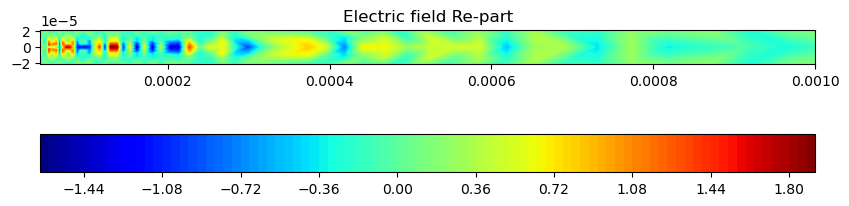

In [10]:
# plot the real part of the electric field
fig, ax = plt.subplots(1,1, figsize=(10,6))
contour = ax.tricontourf(mesh_zx_z.flatten(), mesh_zx_x.flatten(), (np.real(result_zx.flatten())), 100, cmap='jet')
ax.set_aspect('equal')

# title
ax.set_title('Electric field Re-part')
# limit x
ax.set_xlim(zmin, 1.0e-3)
ax.set_ylim(-2*aper, 2*aper)
fig.colorbar(contour, ax=ax, orientation='horizontal')

## Propagation Simulation
The diffraction equation either the Rayleigh-Sommerfield or with simplified approximations like the Fresnel, both can be written in terms of convolution integrals. Fourier transforms can be used to convert the convolution to a simple multiplication.

As an example if we take a one dimensional convolution integral such that the impulse is $h(x)$ and the input is $f(x)$, the convolution integral is given by:

$$ g(x) = h(x)*f(x) = \int_{-\infty}^{\infty} h(x - x') f(x') dx' $$

Note the limits of integration are from $-\infty$ to $\infty$. The convolution theorem of Fourier transforms states that the convolution integral can be converted to a multiplication in the Fourier domain. 

$$ \mathcal{F} \left\{ g(x) \right\} = \mathcal{F} \left\{ h(x) \right\} \mathcal{F} \left\{ f(x) \right\} $$
$$ g(x) = \mathcal{F}^{-1} \left\{ \mathcal{F} \left\{ h(x) \right\} \mathcal{F} \left\{ f(x) \right\} \right\} $$

### References
[1] Computational Fourier Optics: A Matlab Tutorial. - David Vuelz


### Different Propagators

Two different approaches to the Fresnel propgagation is presented. The two differe in the aapproach as to how the response of the impulse is calculated. The "propTF" has an analytical form of the response with some simiplifications. The "propIR" calculates the response using Fourier transformation.

The limitations and advantages of the two approaches are discussed in the references.

In [11]:
# import scipy for fft
from scipy.fftpack import fft2,fft,ifft2,ifft
from scipy.fftpack import fftshift, fftfreq, ifftshift
import numpy as np
import matplotlib.pyplot as plt

## Define a function propTF to calculate the transfer function of the Fresnel propagator
# uses one FFT
def propTF(u1, L , wln , z):
    # propagation transfer function approach, assumes same x and y side lengths and uniform sampling
    # u1 is the wave in the source plane
    # L is the side length of the source plane and observation plane
    # wln is the wavelength
    # z is the propagation distance
    # returns the observation plane results

    # input field arrays
    M,N = np.shape(u1)
    dx = L/M
    k = 2*np.pi/wln

    # x and y assumed to have the same number of points so dy = dx

    # make the frequency coordinates
    fx = np.linspace(-1/(2*dx), 1/(2*dx)-1/L, M)
    fy = np.linspace(-1/(2*dx), 1/(2*dx)-1/L, N)

    # make a meshgrid
    fx_mesh, fy_mesh = np.meshgrid(fx, fy)

    # make the transfer function
    z_ph = np.exp(1j*k*z)
    H = np.exp(-1j*np.pi*wln*z*(fx_mesh**2 + fy_mesh**2))*z_ph
    H = fftshift(H)


    # fft of the input field
    u1_fft = fft2(fftshift(u1))
    u2 = H*u1_fft
    
    u2_out = ifftshift(ifft2(u2))

    return u2_out



# Fresnel Impulse Response (IR) Propagator
# Here are two FFT's required , so you work on the spatial coordinates first
def propIR(u1,L,wln,z):
    # Fresnel impulse response approach, assumes same x and y side lengths and uniform sampling
    # u1 is the wave in the source plane
    # L is the side length of the source plane and observation plane
    # wln is the wavelength
    # z is the propagation distance
    # returns the observation plane results

    # input field arrays
    M,N = np.shape(u1)
    dx = L/M
    dy = L/N
    k = 2*np.pi/wln

    # x and y same coordinates
    x = np.linspace(-L/2, L/2-dx, M)
    y = np.linspace(-L/2, L/2-dy, N)

    # make a meshgrid
    x_mesh, y_mesh = np.meshgrid(x, y)

    # make the impulse response
    h = np.exp(1j*k*z)/(1j*wln*z)*np.exp(1j*k/(2*z)*(x_mesh**2 + y_mesh**2))

    # the transfer function is the fft of the impulse response
    hf = fft2(fftshift(h))*dx*dy

    # fft of source field
    u1f = fft2(fftshift(u1))      # take note of the sacling factor used here, since one IFFT will be used the scaling can be removed

    # multiply the source field by the transfer function
    u2f = hf*u1f

    # inverse fft to get the observation plane field
    u2_out = ifftshift(ifft2(u2f))


    return u2_out


Text(0.5, 1.0, 'Z=0 m')

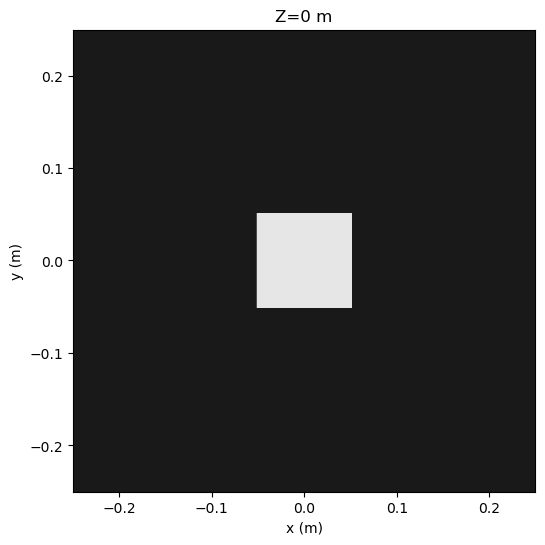

In [12]:
# ## Check the lens propagators with a square beam
# import numpy as np
# import matplotlib.pyplot as plt

## SOURCE PLANE

L1 = 0.5            # side length of the source plane, here same for the source and observation plane but might be different for other propagators
M = 1024        # number of points in the source plane
dx1 = L1/M          # source plane sampling


# make the source plane coordinates
# Source and observation planes can have different coordinates
# x2 would be the observation plane coordinates for x axis
x1 = np.linspace(-L1/2, L1/2-dx1, M)
y1 = np.linspace(-L1/2, L1/2-dx1, M)

wln = 0.5e-6        # wavelength
k  = 2*np.pi/wln   # wave number

# beam parameters
hw = 0.051         # half width of the beam


# make a meshgrid
x1_mesh, y1_mesh = np.meshgrid(x1, y1)


# make the source field
u1 = np.zeros((M,M), dtype=complex)
u1[(np.abs(x1_mesh) < hw ) & (np.abs(y1_mesh) < hw )] = 1.0
# for isclose values
u1[np.isclose(np.abs(x1_mesh), hw) & (np.abs(y1_mesh) < hw )] = 1.0
u1[(np.abs(x1_mesh) < hw ) & np.isclose(np.abs(y1_mesh), hw)] = 1.0
u1[np.isclose(np.abs(x1_mesh), hw) & np.isclose(np.abs(y1_mesh), hw)] = 1.0



# irradiance of the source
i1 = np.abs(u1)**2
# plot the source irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
contour = ax.contourf(x1_mesh, y1_mesh, i1, 4, cmap='gray')

# set equal aspect ratio, and label the axes
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Z=0 m')





Text(0, 0.5, 'y (m)')

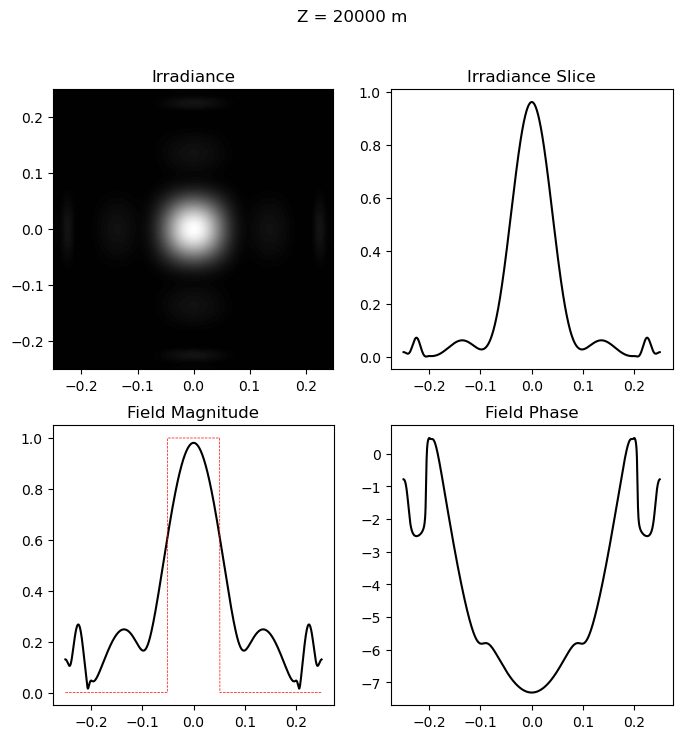

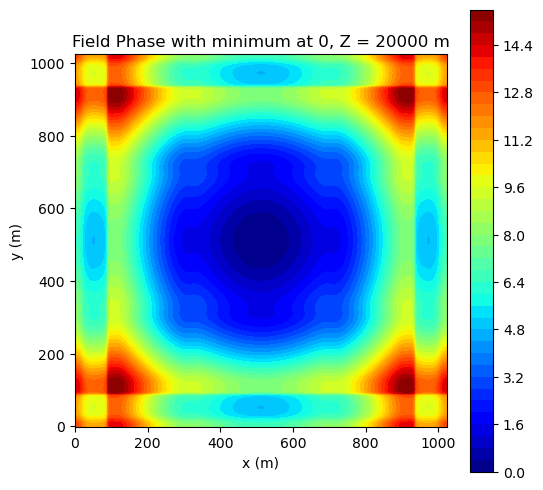

In [13]:
## PROPAGATION

z = 20000          # propagation distance

# u2 = propTF(u1, L1, wln, z)     # transfer function approach
u2 = propIR(u1, L1, wln, z)     # impulse response approach

# observation plane coordinates
x2 = x1
y2 = y1
i2 = np.abs(u2)**2

# plot results: 4 subplots
fig, ax = plt.subplots(2,2, figsize=(8,8))
# set all plots aspects to equal
ax[0,0].set_aspect('equal')

# first plot the irradiance
contour = ax[0,0].contourf(x2, y2, i2, 100, cmap='gray')


# plot slice of the irradiance
ax[0,1].plot(x2, i2[M//2,:], 'k')

# observed field magnitude
ax[1,0].plot(x2, np.abs(u2[M//2,:]), 'k')
# field at source plane for reference
ax[1,0].plot(x1, np.abs(u1[M//2,:]), 'r', linestyle='--', linewidth=0.5)

# observed field phase after unwrapping
ax[1,1].plot(x2, np.unwrap(np.angle(u2[M//2,:])), 'k')
# # contour plot of the phase with unwrapping in both directions
# phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# contour = ax[1,1].contourf(x2, y2, phase, 100, cmap='jet')
# # show the colorbar
# fig.colorbar(contour, ax=ax[1,1])

# set title for the figure
fig.suptitle('Z = ' + str(z) + ' m')
ax[0,0].set_title('Irradiance')
ax[0,1].set_title('Irradiance Slice')
ax[1,0].set_title('Field Magnitude')
ax[1,1].set_title('Field Phase')



# new plot for 2D phase
fig, ax = plt.subplots(1,1, figsize=(6,6))
# contour plot of the phase with unwrapping in both directions
phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# make all the values positive for the contour plot
phase = phase + np.abs(np.min(phase))
contour = ax.contourf(x2, y2, phase, 100, cmap='jet')
# contour = ax.contourf(x2, y2, np.abs(phase), 100, cmap='jet')
contour = ax.contourf(phase, 50, cmap='jet')
# show the colorbar horizontal
fig.colorbar(contour, ax=ax, orientation='vertical')
# equal aspect ratio
ax.set_aspect('equal')
# set title for the figure
ax.set_title('Field Phase with minimum at 0, Z = ' + str(z) + ' m')
# set equal aspect ratio, and label the axes
# ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')


### Test Propagation of Gaussian Beam

The intensity of a Gaussian beam propagating in the z direction is given by:

$$ I(x,y,z) = I_0 \left( \frac{w_0}{w(z)}\right)^2 exp\left( -2\frac{x^2 + y^2}{w(z)^2} \right) $$

where $w(z) = w_0 \sqrt{1 + \left( \frac{z}{z_R} \right)^2}$ and $z_R = \pi w_0^2 / \lambda$.

where $I_0$ is the peak intensity at $w_0$ ( waist ). For the electric field assume it is given by:

$$ E(x,y) = E_0 exp\left( -\frac{x^2 + y^2}{w_0^2} \right) $$

Text(0.5, 1.0, 'Z=0 m')

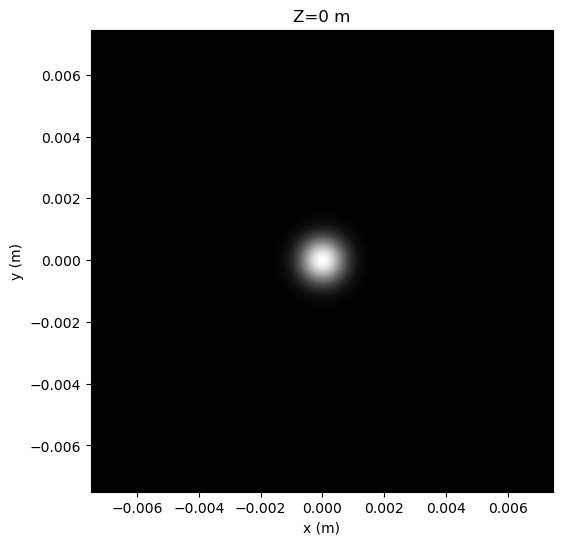

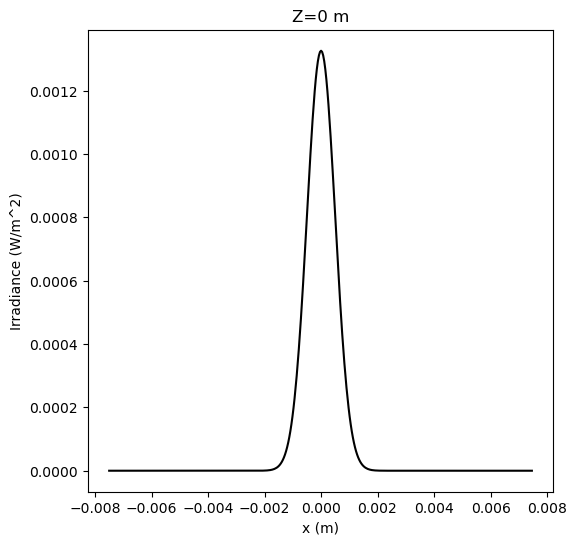

In [14]:
# Use the propagators for propagation of a Gaussian beam

# EM wave details
wln = 0.633e-6        # wavelength
A0 = 1.0              # amplitude of the source V/m
eta_0 = 377.0         # free space impedance
k = 2*np.pi/wln      # wave number

# waist size
w0 = 1.0e-3

# rayleigh range
z_R = np.pi*w0**2/wln

L1 = 15.0e-3            # side length of the source plane, here same for the source and observation plane but might be different for other propagators
M = 400                 # number of points in the source plane
dx1 = L1/M          # source plane sampling


# make the source plane coordinates
# Source and observation planes can have different coordinates
# x2 would be the observation plane coordinates for x axis
x1 = np.linspace(-L1/2, L1/2-dx1, M)
y1 = np.linspace(-L1/2, L1/2-dx1, M)


# make a meshgrid
x1_mesh, y1_mesh = np.meshgrid(x1, y1)


# make the source field
# u1 = np.zeros((M,M), dtype=complex)
u1 = A0*np.exp(-(x1_mesh**2 + y1_mesh**2)/w0**2)*np.ones((M,M), dtype=complex)



# irradiance of the source
# i1 = A0**2/(2.0*eta_0)
i1 = np.abs(u1)**2/(2.0*eta_0)
# plot the source irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
contour = ax.contourf(x1_mesh, y1_mesh, i1, 100, cmap='gray')

# set equal aspect ratio, and label the axes
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Z=0 m')


# show a 1D slice of the irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(x1, i1[M//2,:], 'k')
ax.set_xlabel('x (m)')
ax.set_ylabel('Irradiance (W/m^2)')
ax.set_title('Z=0 m')



Text(0, 0.5, 'y (m)')

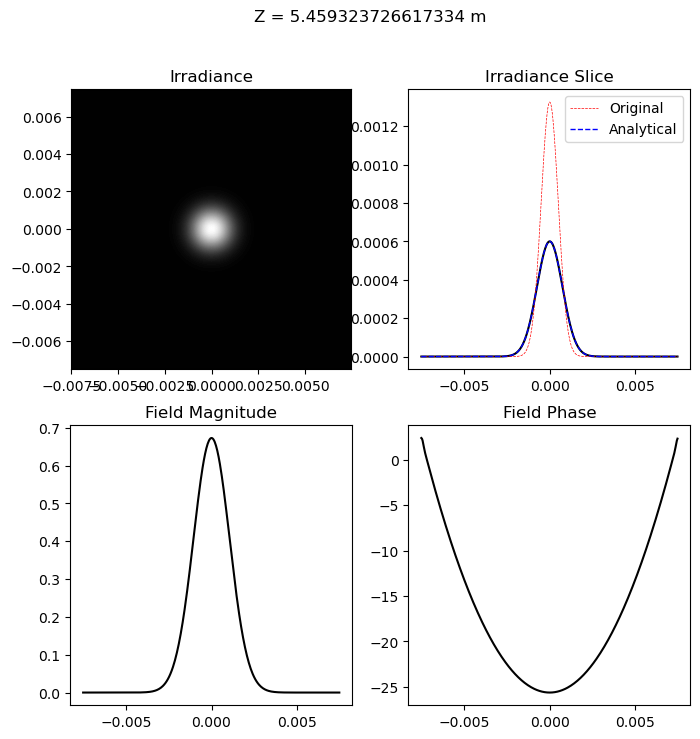

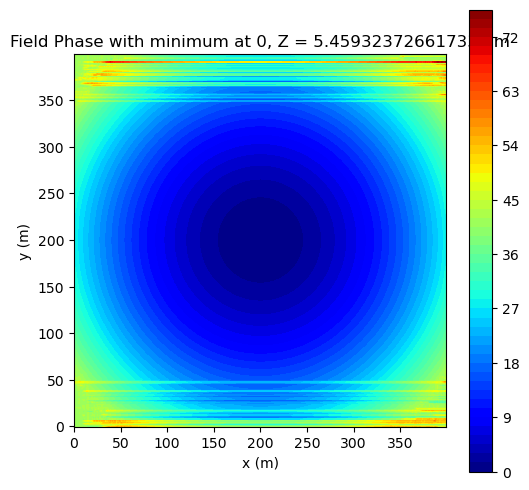

In [15]:
## PROPAGATION

z = z_R*1.1        # propagation distance



u2 = propTF(u1, L1, wln, z)     # transfer function approach
# u2 = propIR(u1, L1, wln, z)     # impulse response approach

# observation plane coordinates
x2 = x1
y2 = y1
i2 = np.abs(u2)**2/(2.0*eta_0)


wz = w0*np.sqrt(1 + (z/z_R)**2)
# find the analytical irradiance for the gaussian beam
i2_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x1_mesh**2 + y1_mesh**2)/wz**2)

# plot results: 4 subplots
fig, ax = plt.subplots(2,2, figsize=(8,8))
# set all plots aspects to equal
ax[0,0].set_aspect('equal')

# first plot the irradiance
contour = ax[0,0].contourf(x2, y2, i2, 100, cmap='gray')


# plot slice of the irradiance
ax[0,1].plot(x2, i2[M//2,:], 'k')
# plot slice of original irradiance
ax[0,1].plot(x1, i1[M//2,:], 'r', linestyle='--', linewidth=0.5, label='Original')
# plot slice of analytical irradiance
ax[0,1].plot(x2, i2_analytical[M//2,:], 'b--', linewidth=1, label='Analytical')
# set the legend
ax[0,1].legend()

# observed field magnitude
ax[1,0].plot(x2, np.abs(u2[M//2,:]), 'k')
# field at source plane for reference
# ax[1,0].plot(x1, np.abs(u1[M//2,:]), 'r', linestyle='--', linewidth=0.5)

# observed field phase after unwrapping
ax[1,1].plot(x2, np.unwrap(np.angle(u2[M//2,:])), 'k')
# # contour plot of the phase with unwrapping in both directions
# phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# contour = ax[1,1].contourf(x2, y2, phase, 100, cmap='jet')
# # show the colorbar
# fig.colorbar(contour, ax=ax[1,1])

# set title for the figure
fig.suptitle('Z = ' + str(z) + ' m')
ax[0,0].set_title('Irradiance')
ax[0,1].set_title('Irradiance Slice')
ax[1,0].set_title('Field Magnitude')
ax[1,1].set_title('Field Phase')



# new plot for 2D phase
fig, ax = plt.subplots(1,1, figsize=(6,6))
# contour plot of the phase with unwrapping in both directions
phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# make all the values positive for the contour plot
phase = phase + np.abs(np.min(phase))
contour = ax.contourf(x2, y2, phase, 100, cmap='jet')
# contour = ax.contourf(x2, y2, np.abs(phase), 100, cmap='jet')
contour = ax.contourf(phase, 50, cmap='jet')
# show the colorbar horizontal
fig.colorbar(contour, ax=ax, orientation='vertical')
# equal aspect ratio
ax.set_aspect('equal')
# set title for the figure
ax.set_title('Field Phase with minimum at 0, Z = ' + str(z) + ' m')
# set equal aspect ratio, and label the axes
# ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')


In [16]:
## Propagation in the xz plane

zmin = wln
zmax = z_R*4
divs_z = 100

# make logarithmically spaced z values
# zvals = np.logspace(np.log10(zmin), np.log10(zmax), divs_z)
z2 = 10.0**np.linspace(np.log10(zmin), np.log10(zmax), divs_z)

# make the xz plane
x2 = x1

z2_mesh, x2_mesh = np.meshgrid(z2, x2, indexing='ij')

wz = w0*np.sqrt(1 + (z2_mesh/z_R)**2)

# Results in the xz plane
u2_xz = np.zeros_like(z2_mesh, dtype=np.complex128)

# the result at z = 0 is the same as the source plane
u2_xz[0,:] = u1[M//2,:]

# loop over the z values
for i in range(1,divs_z):
    # propagate the field
    u2_z = propTF(u1, L1, wln, z2[i])

    # store the results
    u2_xz[i,:] = u2_z[M//2,:]


# calculate the irradiance
i2_xz = np.abs(u2_xz)**2/(2.0*eta_0)







Text(0.5, 1.0, 'Irradiance Slice at different z')

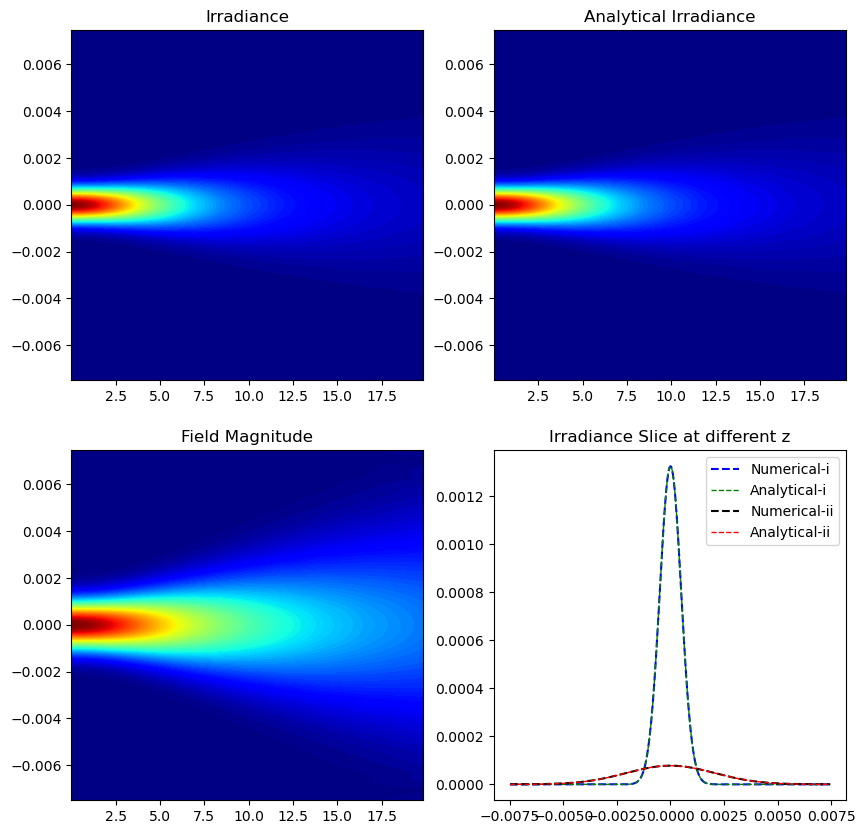

In [17]:
# plot the results: make 4 subplots
fig, ax = plt.subplots(2,2, figsize=(10,10))

# first plot the irradiance
contour = ax[0,0].contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')
# equal aspect ratio
# ax[0,0].set_aspect('equal')
ax[0,0].set_title('Irradiance')

# plot the analytical irradiance
i2_xz_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x2_mesh**2)/wz**2)
# contour plot
contour = ax[0,1].contourf(z2_mesh, x2_mesh, i2_xz_analytical, 100, cmap='jet')
# equal aspect ratio
# ax[0,1].set_aspect('equal')
ax[0,1].set_title('Analytical Irradiance')

# plot the magnitude of the field
contour = ax[1,0].contourf(z2_mesh, x2_mesh, np.abs(u2_xz), 100, cmap='jet')
ax[1,0].set_title('Field Magnitude')


# plot the intensity of the field at mid z
ax[1,1].plot(x2, i2_xz[divs_z//2,:], 'b--', label='Numerical-i')
# plot the analytical intensity
ax[1,1].plot(x2, i2_xz_analytical[divs_z//2,:], 'g--', linewidth=1, label='Analytical-i')
# plot the intensity of the field at the end z
ax[1,1].plot(x2, i2_xz[-1,:], 'k--', label='Numerical-ii')
# plot the analytical intensity
ax[1,1].plot(x2, i2_xz_analytical[-1,:], 'r--', linewidth=1, label='Analytical-ii')

ax[1,1].legend()
ax[1,1].set_title('Irradiance Slice at different z')




### Test Propagation of Other Beams ( Flat - Top)

The intensity of a Flat-Top beam propagating in the z direction is not known analytically. Might have analytical results but is complicated. The intensity distribution at $z = 0$ is assumed a shape of flat-top described by the following distribution:

$$ I(x,y,z) = I_0 exp\left( -2 \left(\frac{x^2 + y^2}{w_0^2}\right)^p \right) $$

where $I_0$ is the peak intensity at $w_0$ ( waist ). For the electric field squared gives the intensity distribution. So the electric field is assumed to be given by the following where $p = 1$ gives a Gaussian beam while $p > 1$ gives a flat-top beams with a sharper edge on increasing $p$.

$$ E(x,y) = E_0 exp\left( -\left(\frac{x^2 + y^2}{w_0^2}\right)^p \right) $$

This electric field distribution is propagated using the Fresnel propagator and the results presented below.

wavelength = 1.064 um
w0 = 300.0 um
z_R = 265.7362206983847 mm
 Number of points in the source plane in one axis = 1024
Critical sampling = 0.2827433388230814 um
Current sampling, dx = 9.765625 um
dx > good for TF approach, dx < good for IR approach
Using TF approach


Text(0, 0.5, 'y (m)')

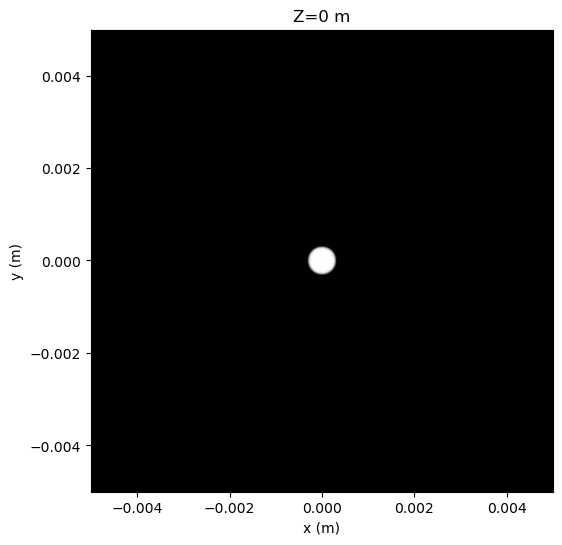

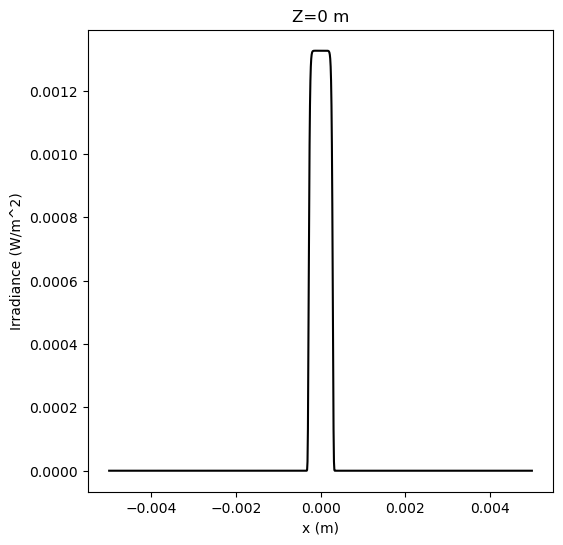

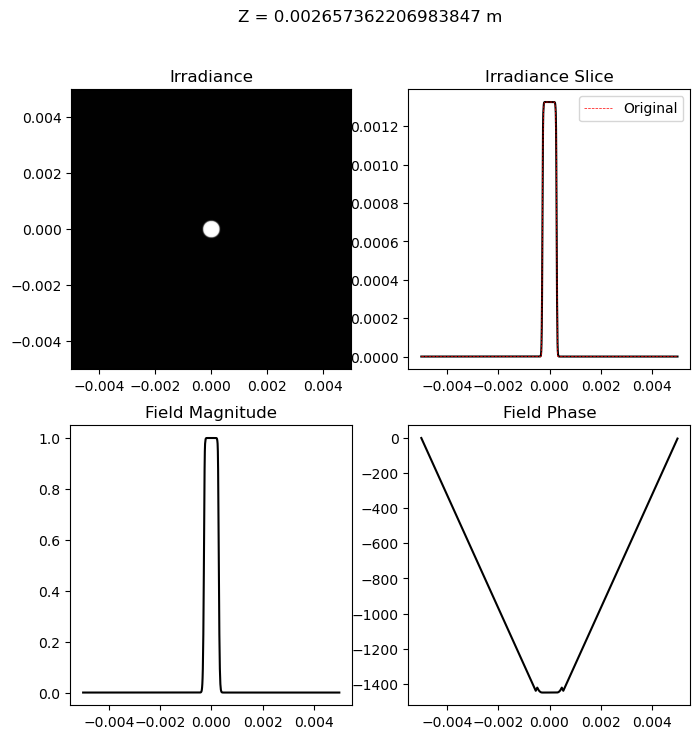

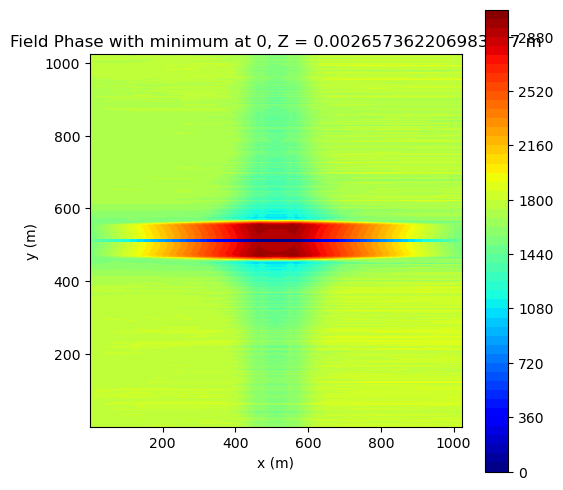

In [118]:
# Use the propagators for propagation of a Gaussian beam

# import scipy for fft
from scipy.fftpack import fft2,fft,ifft2,ifft
from scipy.fftpack import fftshift, fftfreq, ifftshift
import numpy as np
import matplotlib.pyplot as plt

# EM wave details
wln = 1064.0e-9        # wavelength
A0 = 1.0              # amplitude of the source V/m
eta_0 = 377.0         # free space impedance
k = 2*np.pi/wln      # wave number

# waist size
w0 = 300.0e-6

# rayleigh range
z_R = np.pi*w0**2/wln

L1 = 10.00e-3            # side length of the source plane, here same for the source and observation plane but might be different for other propagators
M = 1024                 # number of points in the source plane
dx1 = L1/M          # source plane sampling


# print the main parameters of the setup
print('wavelength = ' + str(wln*1e6) + ' um')
print('w0 = ' + str(w0*1e6) + ' um')
print('z_R = ' + str(z_R*1e3) + ' mm')
print(' Number of points in the source plane in one axis = ' + str(M))

# make the source plane coordinates
# Source and observation planes can have different coordinates
# x2 would be the observation plane coordinates for x axis
x1 = np.linspace(-L1/2, L1/2-dx1, M)
y1 = np.linspace(-L1/2, L1/2-dx1, M)


# make a meshgrid
x1_mesh, y1_mesh = np.meshgrid(x1, y1)


# make the source field
# u1 = np.zeros((M,M), dtype=complex)
p = 8 # for changing the shape of the beam
u1 = A0*np.exp(-((x1_mesh**2 + y1_mesh**2)/w0**2)**p)*np.ones((M,M), dtype=complex)



# irradiance of the source
# i1 = A0**2/(2.0*eta_0)
i1 = np.abs(u1)**2/(2.0*eta_0)
# plot the source irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
contour = ax.contourf(x1_mesh, y1_mesh, i1, 100, cmap='gray')

# set equal aspect ratio, and label the axes
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Z=0 m')


# show a 1D slice of the irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(x1, i1[M//2,:], 'k')
ax.set_xlabel('x (m)')
ax.set_ylabel('Irradiance (W/m^2)')
ax.set_title('Z=0 m')

## PROPAGATION#################################################



## Test for different propagation distances
zmin = z_R*0.01
zmax = z_R*6.0


z = zmin   # propagation distance



## Sampling resolution
cri_samp = wln*z/L1

# print the critical sampling
print('Critical sampling = ' + str(cri_samp*1e6) + ' um')
# print current sampling
print('Current sampling, dx = ' + str(dx1*1e6) + ' um')

# print a disclaimer on what sampling to use
print("dx > good for TF approach, dx < good for IR approach")

# suggest what to use
if dx1 > cri_samp:
    print('Using TF approach')
    u2 = propTF(u1, L1, wln, z)     # transfer function approach
else:
    print('Use IR approach')
    u2 = propIR(u1, L1, wln, z)     # impulse response approach



# observation plane coordinates
x2 = x1
y2 = y1
i2 = np.abs(u2)**2/(2.0*eta_0)





wz = w0*np.sqrt(1 + (z/z_R)**2)
# find the analytical irradiance for the gaussian beam
i2_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x1_mesh**2 + y1_mesh**2)/wz**2)

# plot results: 4 subplots
fig, ax = plt.subplots(2,2, figsize=(8,8))
# set all plots aspects to equal
ax[0,0].set_aspect('equal')

# first plot the irradiance
contour = ax[0,0].contourf(x2, y2, i2, 100, cmap='gray')


# plot slice of the irradiance
ax[0,1].plot(x2, i2[M//2,:], 'k')
# plot slice of original irradiance
ax[0,1].plot(x1, i1[M//2,:], 'r', linestyle='--', linewidth=0.5, label='Original')
# plot slice of analytical irradiance
# ax[0,1].plot(x2, i2_analytical[M//2,:], 'b--', linewidth=1, label='Analytical')
# set the legend
ax[0,1].legend()

# observed field magnitude
ax[1,0].plot(x2, np.abs(u2[M//2,:]), 'k')
# field at source plane for reference
# ax[1,0].plot(x1, np.abs(u1[M//2,:]), 'r', linestyle='--', linewidth=0.5)

# observed field phase after unwrapping
ax[1,1].plot(x2, np.unwrap(np.angle(u2[M//2,:])), 'k')
# # contour plot of the phase with unwrapping in both directions
# phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# contour = ax[1,1].contourf(x2, y2, phase, 100, cmap='jet')
# # show the colorbar
# fig.colorbar(contour, ax=ax[1,1])

# set title for the figure
fig.suptitle('Z = ' + str(z) + ' m')
ax[0,0].set_title('Irradiance')
ax[0,1].set_title('Irradiance Slice')
ax[1,0].set_title('Field Magnitude')
ax[1,1].set_title('Field Phase')



# new plot for 2D phase
fig, ax = plt.subplots(1,1, figsize=(6,6))
# contour plot of the phase with unwrapping in both directions
phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# make all the values positive for the contour plot
phase = phase + np.abs(np.min(phase))
contour = ax.contourf(x2, y2, phase, 100, cmap='jet')
# contour = ax.contourf(x2, y2, np.abs(phase), 100, cmap='jet')
contour = ax.contourf(phase, 50, cmap='jet')
# show the colorbar horizontal
fig.colorbar(contour, ax=ax, orientation='vertical')
# equal aspect ratio
ax.set_aspect('equal')
# set title for the figure
ax.set_title('Field Phase with minimum at 0, Z = ' + str(z) + ' m')
# set equal aspect ratio, and label the axes
# ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

In [119]:
## Propagation in the xz plane

# zmin = wln*10.0

zmin = z_R*0.01
zmax = z_R*4.0
divs_z = 200

# make logarithmically spaced z values
# zvals = np.logspace(np.log10(zmin), np.log10(zmax), divs_z)
z2 = 10.0**np.linspace(np.log10(zmin), np.log10(zmax), divs_z)

# make the xz plane
x2 = x1

z2_mesh, x2_mesh = np.meshgrid(z2, x2, indexing='ij')

wz = w0*np.sqrt(1 + (z2_mesh/z_R)**2)

# Results in the xz plane
u2_xz = np.zeros_like(z2_mesh, dtype=np.complex128)

# the result at z = 0 is the same as the source plane
u2_xz[0,:] = u1[M//2,:]

# # loop over the z values
# for i in range(1,divs_z):
#     # propagate the field
#     # u2_z = propTF(u1, L1, wln, z2[i])
#     u2_z = propIR(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]


# ## loop over the z values to the new field but use first method for half of z and second method for the other half
# for i in range(1,divs_z//2):
#     # propagate the field
#     u2_z = propTF(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]

# for i in range(divs_z//2,divs_z):
#     # propagate the field
#     u2_z = propIR(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]


# select the propagator based on critical sampling
cir_samples = wln*z2/L1 # critical sample for each z value
# find the first index when dx < cir_samples in cir_samples
# initially dx will be larger than cir_samples so use TF approach
# after dx < cir_samples use IR approach
id_change = np.where(cir_samples > dx1)[0][0]
for i in range(1,id_change):
    # propagate the field
    u2_z = propTF(u1, L1, wln, z2[i])

    # store the results
    u2_xz[i,:] = u2_z[M//2,:]

for i in range(id_change,divs_z):
    # propagate the field
    u2_z = propIR(u1, L1, wln, z2[i])

    # store the results
    u2_xz[i,:] = u2_z[M//2,:]

# calculate the irradiance
i2_xz = np.abs(u2_xz)**2/(2.0*eta_0)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


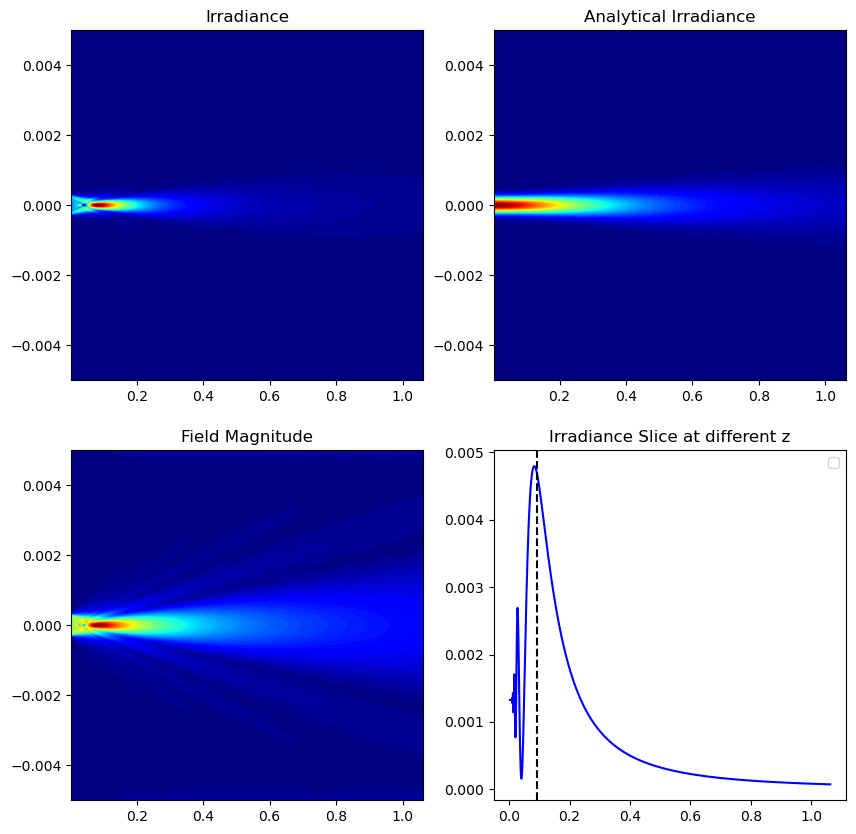

In [120]:
# plot the results: make 4 subplots
fig, ax = plt.subplots(2,2, figsize=(10,10))

# first plot the irradiance
contour = ax[0,0].contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')
# equal aspect ratio
# ax[0,0].set_aspect('equal')
ax[0,0].set_title('Irradiance')

# plot the analytical irradiance
i2_xz_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x2_mesh**2)/wz**2)
# contour plot
contour = ax[0,1].contourf(z2_mesh, x2_mesh, i2_xz_analytical, 100, cmap='jet')
# equal aspect ratio
# ax[0,1].set_aspect('equal')
ax[0,1].set_title('Analytical Irradiance')

# plot the magnitude of the field
contour = ax[1,0].contourf(z2_mesh, x2_mesh, np.abs(u2_xz), 100, cmap='jet')
ax[1,0].set_title('Field Magnitude')


# # plot the intensity of the field at mid z
# ax[1,1].plot(x2, i2_xz[divs_z//2,:], 'b--', label='Numerical-i')
# # plot the analytical intensity
# ax[1,1].plot(x2, i2_xz_analytical[divs_z//2,:], 'g--', linewidth=1, label='Analytical-i')
# # plot the intensity of the field at the end z
# ax[1,1].plot(x2, i2_xz[-1,:], 'k--', label='Numerical-ii')
# # plot the analytical intensity
# ax[1,1].plot(x2, i2_xz_analytical[-1,:], 'r--', linewidth=1, label='Analytical-ii')



# plot the irradiance slice at x = 0
ax[1,1].plot(z2, i2_xz[:,M//2], 'b')


ax[1,1].legend()
ax[1,1].set_title('Irradiance Slice at different z')


# also plot a vertical line when id change happened
ax[1,1].axvline(z2[id_change], color='k', linestyle='--',linewidth=0.5, label='Propagation Method Changes')
# ax[1,1].plot([z2[id_change],z2[id_change]], [0,1], 'k--')


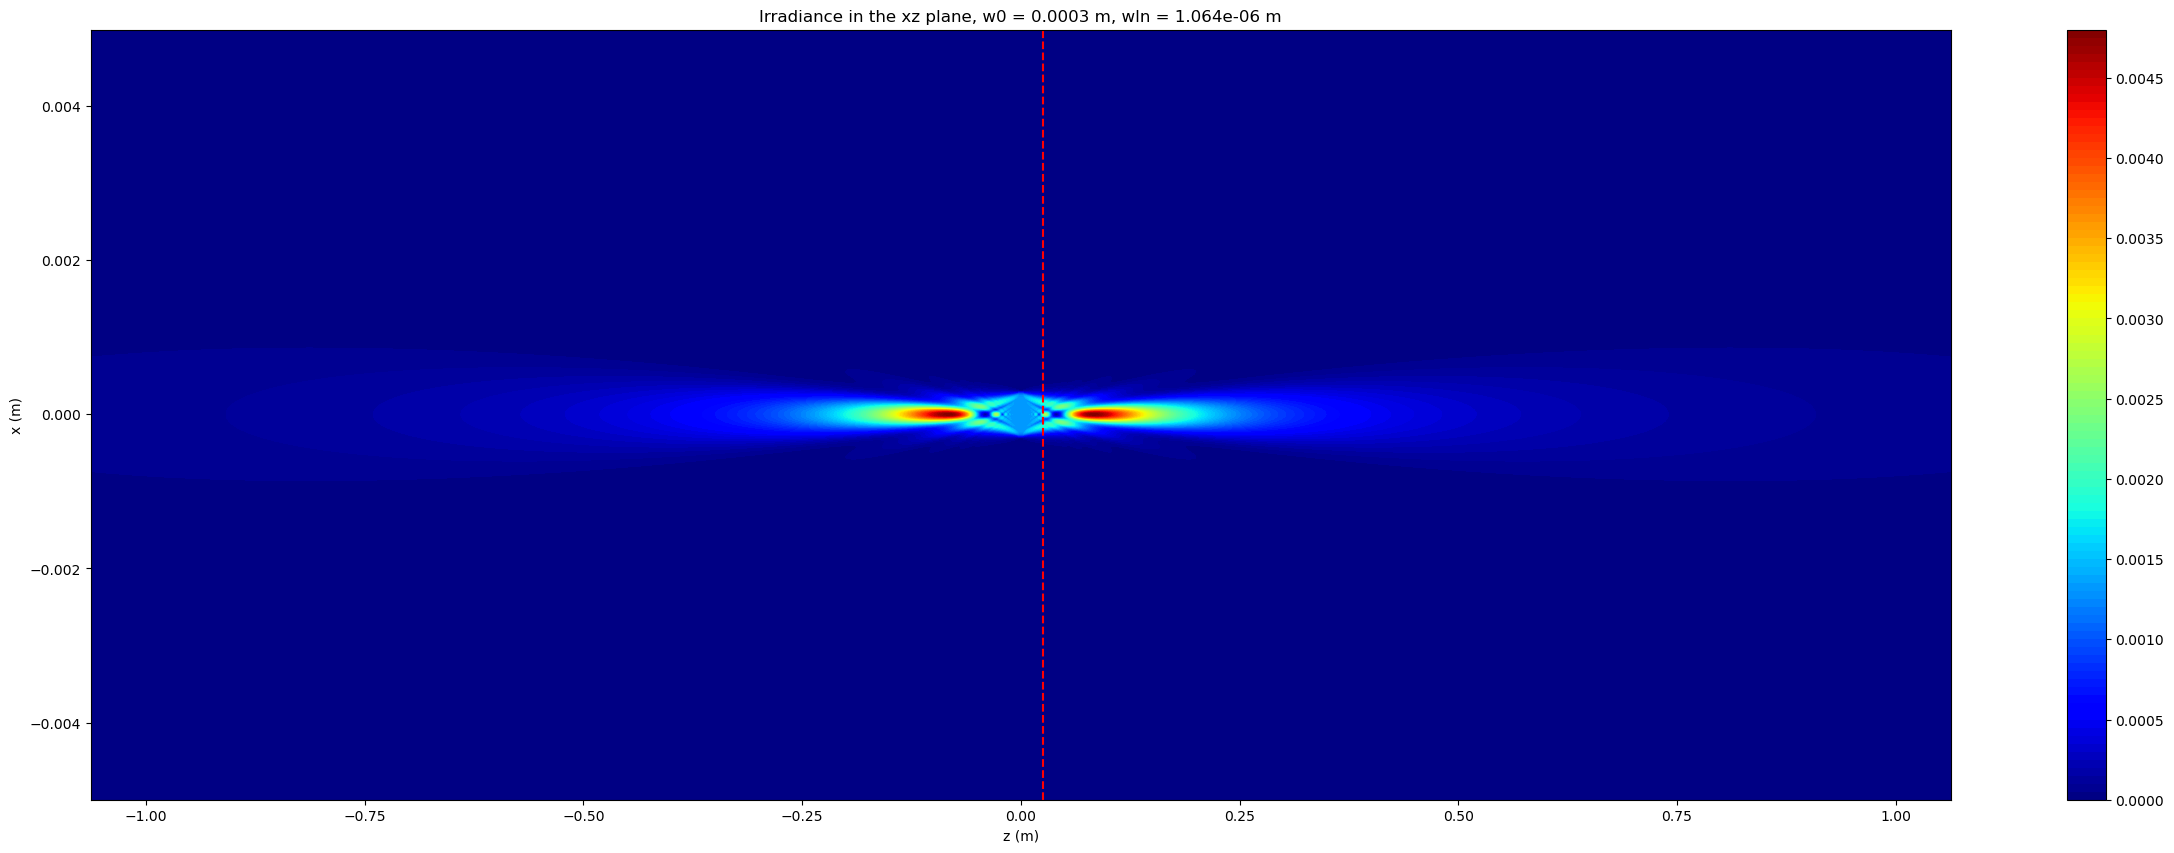

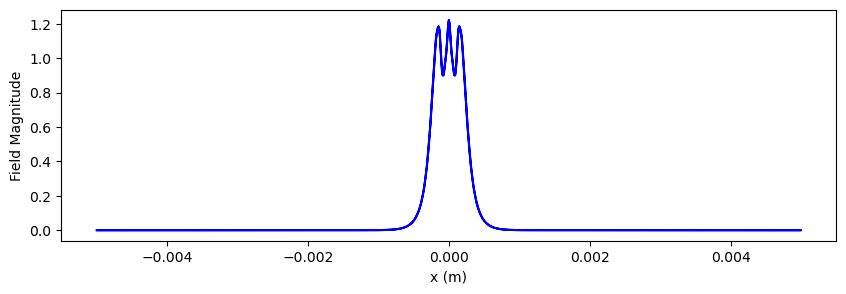

In [121]:
# do a contour plot of xz by extending z axis by reflection along z=0

new_x2 = np.concatenate((x2, -x2))
new_z2 = np.concatenate((z2, -z2))

new_i2_xz = np.concatenate((i2_xz, i2_xz), axis=1)
new_u2_xz = np.concatenate((u2_xz, u2_xz), axis=1)


# flatten the arrays and results
flat_x2 = x2_mesh.flatten()
flat_z2 = z2_mesh.flatten()
flat_i2_xz = i2_xz.flatten()
flat_u2_xz = u2_xz.flatten()

# now reflect the results along z = 0
new_flat_x2 = np.concatenate((flat_x2, flat_x2))
new_flat_z2 = np.concatenate((flat_z2, -flat_z2))
new_flat_i2_xz = np.concatenate((flat_i2_xz, flat_i2_xz))
new_flat_u2_xz = np.concatenate((flat_u2_xz, flat_u2_xz))


# plot the results:
fig, ax = plt.subplots(1,1, figsize=(30,10))

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
# ax.set_title('Irradiance in the xz plane')
# title specifying w0 and wln
ax.set_title('Irradiance in the xz plane, w0 = ' + str(w0) + ' m, wln = ' + str(wln) + ' m')

# contour plot
# contour = ax.contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')
# # plot the reflection of the contour plot from z=0
# contour = ax.contourf(-z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')

# contour plot from flat arrays, tri contour
contour = ax.tricontourf(new_flat_z2, new_flat_x2, new_flat_i2_xz, 100, cmap='jet')



# colorbar
fig.colorbar(contour, ax=ax)


# define a function to give the irradiance result at specifiec z
def get_irradiance_at_z(z,i2_xz):
    # find the index of the z value in the z array
    id = np.argmin(np.abs(z2-z))
    # return the irradiance at that z
    return i2_xz[id,:]

# plot new results from speficied z
fig, ax1 = plt.subplots(1,1, figsize=(10,3))

ax1.set_xlabel('x (m)')
ax1.set_ylabel('Field Magnitude')


# select a value of z to plot the irradiance at
z = 0.025
# plot the irradiance at that z
# ax1.plot(new_x2, get_irradiance_at_z(z, new_i2_xz), 'b', label='z = {:.2e} m'.format(z))
# ax1.plot(new_x2, get_irradiance_at_z(z, new_u2_xz), 'b', label='z = {:.2e} m'.format(z))
to_plt = get_irradiance_at_z(z, new_u2_xz)
ax1.plot(new_x2, np.abs(to_plt), 'b', label='z = {:.2e} m'.format(z))

# plot the line at chose n z on the previous plot
ax.plot([z,z], [x2[0], x2[-1]], 'r--', label='z = {:.2e} m'.format(z))



# limit x values in ax
# ax.set_xlim([-0.08,0.08])

## equal aspect ratio for the first plot
# ax.set_aspect('equal')

(-0.002, 0.002)

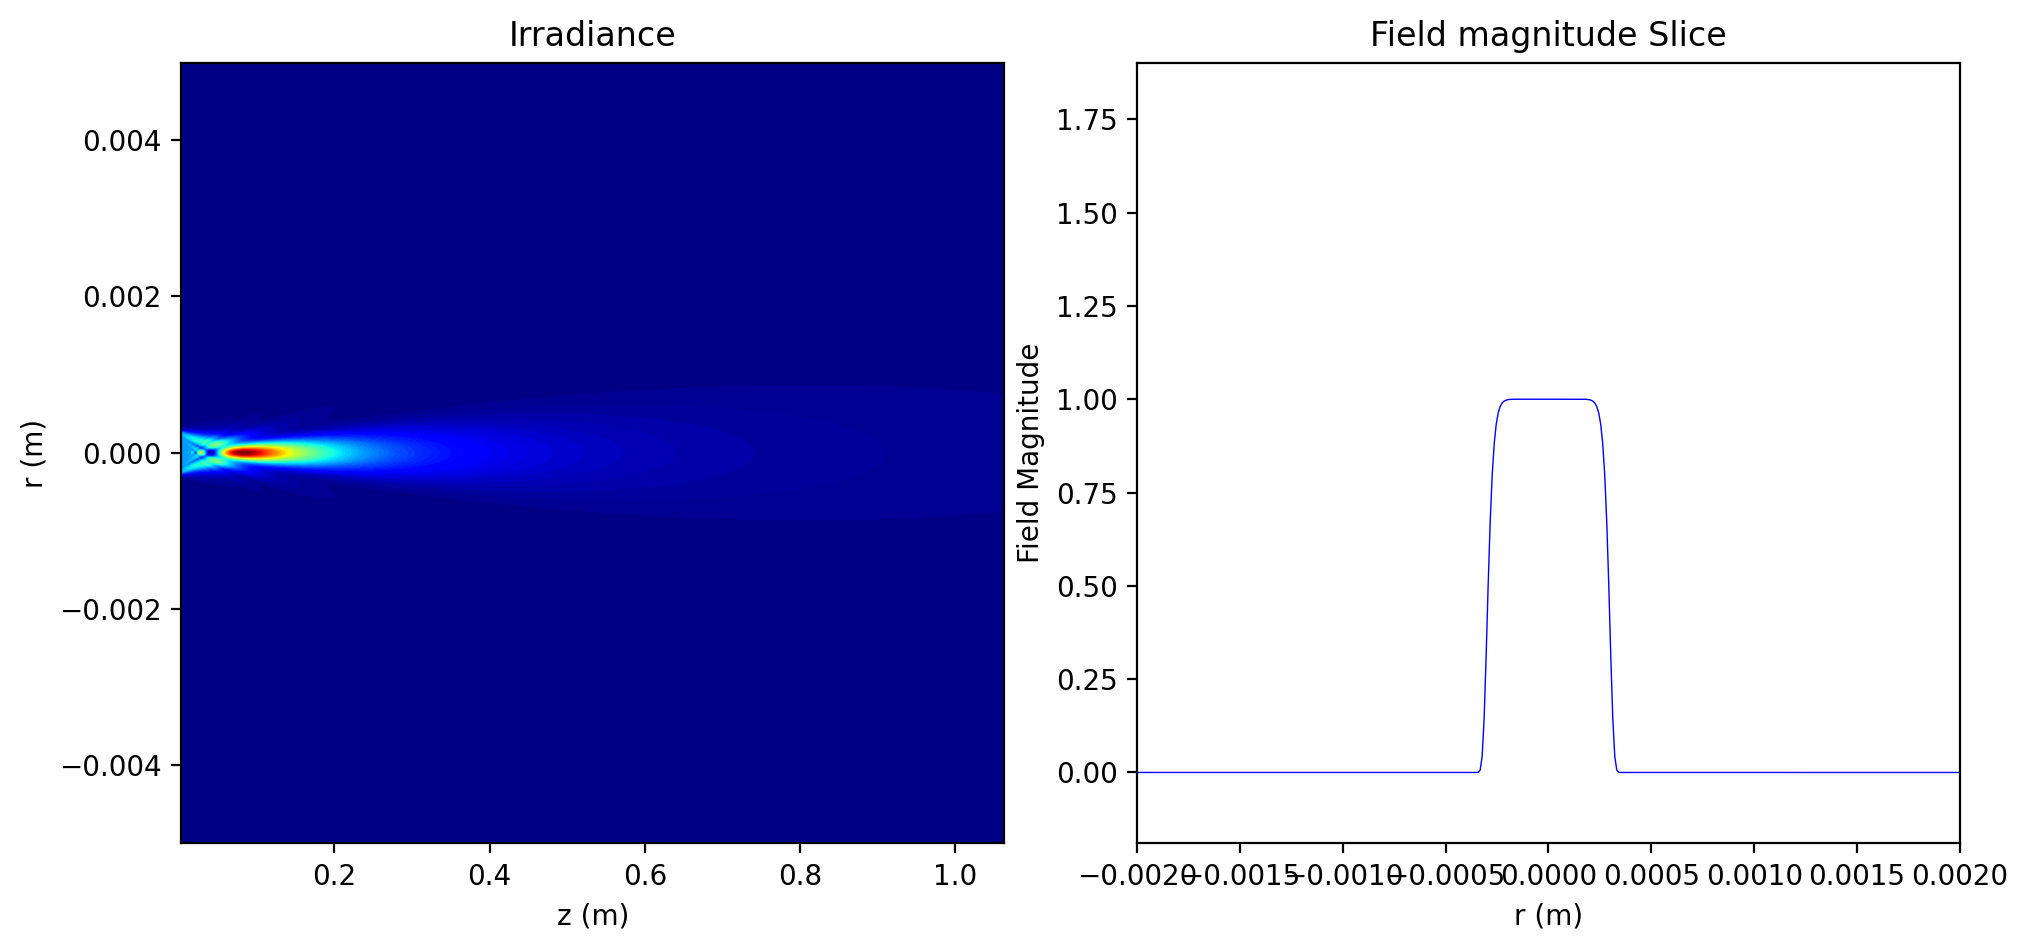

In [133]:
# plot i2_xz slices for different z along the x axis and make a movie for different z
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


### Choose the slice to plot
slice_var = np.abs(u2_xz) # i2_xz or u2_xz
tot_frames = divs_z

# create figure and axes
fig, ax = plt.subplots(1,2, figsize=(10,5))
# set dpi
fig.set_dpi(200)

# setup the plots
ax[0].set_xlabel('z (m)')
ax[0].set_ylabel('r (m)')
ax[0].set_title('Irradiance')
ax[1].set_xlabel('r (m)')
ax[1].set_ylabel('Field Magnitude')
ax[1].set_title('Field magnitude Slice')

# create the objects that change in the animations

# title of the figure
title = fig.suptitle('')
line1, = ax[0].plot([], [], 'r',linewidth=1.5)
line2, = ax[1].plot([], [], 'r--',linewidth=1)

# # plot the static things
ax[0].contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')




# ax[1].plot(x2, i2_xz[0,:], 'b',lw=0.5)
ax[1].plot(x2, (slice_var[0,:]), 'b',lw=0.5)
# tight layout
fig.tight_layout()

# limit the y in second plot to the max of the irradiance
# ax[1].set_ylim(0, np.max(i2_xz))
ax[1].set_ylim(-0.1*np.max(slice_var), np.max(slice_var))

# zoom into the slice on second plot
ax[1].set_xlim(-0.002, 0.002)

# ## set equal aspect ratio
# ax[0].set_aspect('equal')


In [134]:
# animation function. This is called sequentially
def drawframe(n):
    # update the data

    # select the id with logarithmic spacing which goes from 0 to divs_z-1
    # id = int(np.logspace(0, np.log10(divs_z-1), tot_frames)[n])
    # id = int((n/tot_frames)*3*divs_z/4+divs_z/4)
    id = int((n/tot_frames)*(divs_z-1)+1)
    znow = z2[id]

    # make a vertical line for plot 1
    xline = np.array([znow, znow])
    yline = np.array([x2[0], x2[-1]])
    line1.set_data(xline, yline)

    # # for plot 2 make a slice of the irradiance
    # line2.set_data(x2, i2_xz[id,:])

    # for plot 2 make a slice of the mag of the field
    line2.set_data(x2, (slice_var[id,:]))

    znow = znow*1e3

    # the title with the current z in scientific notation
    title.set_text('z = {:.2e} mm'.format(znow))
    # # print id
    # print(id)

    return (line1,line2)




In [135]:
from matplotlib import animation



# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=tot_frames, interval=30, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

# save the video
anim.save('xz_crossField.mp4', fps=30, extra_args=['-vcodec', 'libx264'])